In [2]:
import requests
import pandas as pd
import json

# URL de la API proporcionada
api_url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/main/TelecomX_Data.json"

def load_data_from_api(url):
    """
    Carga datos JSON desde una URL de API y los convierte en un DataFrame de Pandas.

    Args:
        url (str): La URL de la API de donde se obtendrán los datos.

    Returns:
        pd.DataFrame: Un DataFrame de Pandas con los datos cargados,
                      o None si ocurre un error.
    """
    try:
        response = requests.get(url)
        response.raise_for_status()  # Lanza un error para códigos de estado HTTP incorrectos (4xx o 5xx)
        data = response.json()
        df = pd.DataFrame(data)
        print("Datos cargados exitosamente desde la API y convertidos a DataFrame.")
        print(f"Número de filas: {df.shape[0]}, Número de columnas: {df.shape[1]}")
        return df
    except requests.exceptions.RequestException as e:
        print(f"Error al conectar con la API o al descargar los datos: {e}")
        return None
    except json.JSONDecodeError as e:
        print(f"Error al decodificar el JSON de la respuesta: {e}")
        return None
    except Exception as e:
        print(f"Ocurrió un error inesperado: {e}")
        return None

if __name__ == "__main__":
    df_telecom = load_data_from_api(api_url)

    if df_telecom is not None:
        # Muestra las primeras filas del DataFrame para verificar
        print("\nPrimeras 5 filas del DataFrame:")
        print(df_telecom.head())

        # Muestra un resumen de la información del DataFrame
        print("\nInformación del DataFrame:")
        df_telecom.info()

        # Opcional: Guardar el DataFrame a un archivo CSV local para uso futuro
        # df_telecom.to_csv('telecom_churn_raw.csv', index=False)
        # print("\nDatos guardados en 'telecom_churn_raw.csv'")

Datos cargados exitosamente desde la API y convertidos a DataFrame.
Número de filas: 7267, Número de columnas: 6

Primeras 5 filas del DataFrame:
   customerID Churn                                           customer  \
0  0002-ORFBO    No  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
1  0003-MKNFE    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
2  0004-TLHLJ   Yes  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
3  0011-IGKFF   Yes  {'gender': 'Male', 'SeniorCitizen': 1, 'Partne...   
4  0013-EXCHZ   Yes  {'gender': 'Female', 'SeniorCitizen': 1, 'Part...   

                                             phone  \
0   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
1  {'PhoneService': 'Yes', 'MultipleLines': 'Yes'}   
2   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
3   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
4   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   

                                            internet  \
0  {'InternetService': 'DSL'

In [3]:
import pandas as pd
import requests
import json

# --- Cargar el DataFrame (reutilizando la función del paso anterior) ---
def load_data_from_api(url):
    try:
        response = requests.get(url)
        response.raise_for_status()
        data = response.json()
        df = pd.DataFrame(data)
        return df
    except Exception as e:
        print(f"Error al cargar datos desde la API: {e}")
        return None

api_url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/main/TelecomX_Data.json"
df_telecom = load_data_from_api(api_url)

if df_telecom is not None:
    print("--- Exploración Inicial del DataFrame ---")

    # 1. Verificar los tipos de datos de las columnas
    print("\nTipos de datos de cada columna:")
    print(df_telecom.dtypes)

    # 2. Obtener un resumen conciso del DataFrame (incluyendo tipos de datos y valores no nulos)
    print("\nInformación detallada del DataFrame:")
    df_telecom.info()

    # 3. Mostrar el nombre de todas las columnas
    print("\nNombres de todas las columnas:")
    print(df_telecom.columns.tolist())

    # --- Consulta al Diccionario de Datos (Manualmente o integrándolo si fuera necesario) ---
    print("\n--- Diccionario de Datos ---")
    print("Consulta el diccionario de datos en el siguiente enlace para entender cada columna:")
    print("https://github.com/ingridcristh/challenge2-data-science-LATAM/blob/main/TelecomX_Data_Dictionary.md")
    print("\nAlgunas columnas clave que es probable que sean relevantes para el análisis de Churn:")
    print("- `Churn`: Es nuestra variable objetivo (¿El cliente se fue o no?).")
    print("- `TotalCharges`: Cantidad total pagada por el cliente (puede indicar compromiso).")
    print("- `MonthlyCharges`: Cuota mensual (impacta la asequibilidad).")
    print("- `tenure`: Antigüedad del cliente (clientes nuevos vs. antiguos).")
    print("- `Contract`: Tipo de contrato (mensual, anual, etc., influye en la libertad de irse).")
    print("- `PaymentMethod`: Método de pago (puede haber correlación con el churn).")
    print("- `InternetService`: Tipo de servicio de internet (velocidad, fiabilidad).")
    print("- `customerID`: Identificador único (importante para el seguimiento, pero no para el modelo).")
    print("- Columnas demográficas como `gender`, `SeniorCitizen`, `Partner`, `Dependents`.")
    print("- Columnas relacionadas con servicios adicionales como `MultipleLines`, `OnlineSecurity`, `OnlineBackup`, `DeviceProtection`, `TechSupport`, `StreamingTV`, `StreamingMovies`.")

    # --- Identificación de Columnas Relevantes (Comentarios iniciales) ---
    print("\n--- Identificación Inicial de Columnas Relevantes para el Análisis de Evasión ---")
    print("Basado en una comprensión inicial y sin un EDA profundo todavía, las columnas más relevantes probablemente serán:")
    print("1.  **Variable Objetivo**: `Churn` (es lo que queremos predecir).")
    print("2.  **Variables Numéricas Clave**: `tenure`, `MonthlyCharges`, `TotalCharges` (relacionadas con el comportamiento de pago y duración).")
    print("3.  **Variables Categóricas Clave**: `Contract`, `InternetService`, `PaymentMethod` (aspectos del servicio y compromiso).")
    print("4.  **Características Demográficas/Servicios Adicionales**: `gender`, `SeniorCitizen`, `Partner`, `Dependents`, `OnlineSecurity`, `TechSupport`, `StreamingTV`, etc. (pueden influir en la satisfacción del cliente).")
    print("\n`customerID` es un identificador y no será usado directamente como característica para el modelo, pero es útil para la identificación de clientes.")
    print("Otras columnas se evaluarán a medida que avancemos en el EDA y la limpieza de datos.")

--- Exploración Inicial del DataFrame ---

Tipos de datos de cada columna:
customerID    object
Churn         object
customer      object
phone         object
internet      object
account       object
dtype: object

Información detallada del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB

Nombres de todas las columnas:
['customerID', 'Churn', 'customer', 'phone', 'internet', 'account']

--- Diccionario de Datos ---
Consulta el diccionario de datos en el siguiente enlace para entender cada columna:
https://github.com/ingridcristh/challenge2-data-science-LATAM/blo

In [5]:
import pandas as pd
import requests
import json
import numpy as np # Importar numpy para manejar NaN

# --- Re-Cargar el DataFrame (si no lo tienes cargado en tu entorno actual) ---
# Re-use the function from the previous cell if df_telecom is not None
if 'df_telecom' not in locals() or df_telecom is None:
    def load_data_from_api(url):
        try:
            response = requests.get(url)
            response.raise_for_status()
            data = response.json()
            df = pd.DataFrame(data)
            return df
        except Exception as e:
            print(f"Error al cargar datos desde la API: {e}")
            return None

    api_url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/main/TelecomX_Data.json"
    df_telecom = load_data_from_api(api_url)


if df_telecom is not None:
    print("--- Verificación y Limpieza Inicial de Datos ---")

    # --- Extract nested data from dictionary columns ---
    print("\nExtracting data from nested columns: 'customer', 'phone', 'internet', 'account'")
    customer_data = pd.json_normalize(df_telecom['customer'])
    phone_data = pd.json_normalize(df_telecom['phone'])
    internet_data = pd.json_normalize(df_telecom['internet'])
    account_data = pd.json_normalize(df_telecom['account'])

    # Concatenate the new columns with the original DataFrame, dropping the original nested columns
    df_telecom = pd.concat([df_telecom.drop(['customer', 'phone', 'internet', 'account'], axis=1),
                            customer_data, phone_data, internet_data, account_data], axis=1)

    print("\nDataFrame columns after extracting nested data:")
    print(df_telecom.columns.tolist())


    ## 1. Manejo de Valores Ausentes (Missing Values) ##
    print("\n1. Verificando valores ausentes:")
    print(df_telecom.isnull().sum())

    # Now 'TotalCharges' should be directly available
    # Observación inicial: 'TotalCharges' a menudo aparece como objeto/string y puede contener espacios en blanco
    # que pandas interpreta como valores válidos pero que representan valores vacíos.
    # Primero, intentaremos convertir 'TotalCharges' a numérico, forzando errores a NaN.
    # Luego, contaremos los NaN reales.

    # Reemplazar espacios en blanco por NaN en 'TotalCharges' y convertir a numérico
    # Ensure TotalCharges column exists after normalization
    if 'TotalCharges' in df_telecom.columns:
        df_telecom['TotalCharges'] = df_telecom['TotalCharges'].replace(' ', np.nan)
        df_telecom['TotalCharges'] = pd.to_numeric(df_telecom['TotalCharges'])

        # Volver a verificar valores ausentes después de la limpieza de TotalCharges
        print("\nValores ausentes después de procesar 'TotalCharges':")
        print(df_telecom.isnull().sum())

        # Una estrategia común para valores ausentes en 'TotalCharges' es imputarlos o eliminar las filas.
        # Para este caso, dado que es un número pequeño de filas, la eliminación es una opción viable.
        # Otra opción sería imputar con la media o la mediana. Por ahora, los eliminaremos.
        rows_with_nan_totalcharges = df_telecom['TotalCharges'].isnull().sum()
        if rows_with_nan_totalcharges > 0:
            print(f"\nSe encontraron {rows_with_nan_totalcharges} valores ausentes en 'TotalCharges'. Eliminando estas filas...")
            df_telecom.dropna(subset=['TotalCharges'], inplace=True)
            print(f"Filas restantes después de eliminar NaN en 'TotalCharges': {df_telecom.shape[0]}")
        else:
            print("\nNo se encontraron valores ausentes significativos en 'TotalCharges'.")
    else:
        print("\n'TotalCharges' column not found after extracting nested data.")


    ## 2. Manejo de Duplicados ##
    print("\n2. Verificando filas duplicadas:")
    duplicate_rows = df_telecom.duplicated().sum()
    if duplicate_rows > 0:
        print(f"Se encontraron {duplicate_rows} filas duplicadas. Eliminándolas...")
        df_telecom.drop_duplicates(inplace=True)
        print(f"Filas restantes después de eliminar duplicados: {df_telecom.shape[0]}")
    else:
        print("No se encontraron filas duplicadas.")


    ## 3. Verificación de Errores de Formato e Inconsistencias en Categorías ##
    # Itera sobre columnas de tipo 'object' (categóricas/string) para revisar valores únicos
    print("\n3. Verificando inconsistencias en columnas categóricas (tipo 'object'):")
    for column in df_telecom.select_dtypes(include='object').columns:
        # Excluir 'customerID' ya que es un identificador único y 'Churn' que es nuestra variable objetivo
        if column not in ['customerID', 'Churn']:
            print(f"\nColumna: '{column}'")
            unique_values = df_telecom[column].unique()
            print(f"Valores únicos: {unique_values}")
            # Puedes añadir aquí lógica para estandarizar valores si encuentras inconsistencias
            # Ejemplo: reemplazar 'No internet service' y 'No phone service' por 'No Service' o similar
            # Esto dependerá de lo que encuentres.

    # Revisar la columna 'Churn' (nuestra variable objetivo)
    print("\nColumna: 'Churn'")
    print(f"Valores únicos: {df_telecom['Churn'].unique()}")
    # Asegurarse de que 'Churn' sea binario (Yes/No) y, si es necesario, convertirlo a 0/1

    # Revisar columnas numéricas para posibles valores atípicos o formatos incorrectos
    print("\n4. Verificando columnas numéricas para formatos incorrectos o valores atípicos iniciales:")
    print("Columnas numéricas (`info()` ya nos dio una buena idea):")
    print(df_telecom.select_dtypes(include=['int64', 'float64']).columns.tolist())
    # Más adelante en el EDA podremos hacer un análisis más profundo de valores atípicos.

    print("\n--- Limpieza y Verificación Inicial Completada ---")
    print("\nEstado actual del DataFrame después de la limpieza:")
    df_telecom.info()
    print("\nPrimeras 5 filas después de la limpieza:")
    display(df_telecom.head())

--- Verificación y Limpieza Inicial de Datos ---

Extracting data from nested columns: 'customer', 'phone', 'internet', 'account'

DataFrame columns after extracting nested data:
['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Charges.Monthly', 'Charges.Total']

1. Verificando valores ausentes:
customerID          0
Churn               0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
Charges.Monthly     0
Charges.Total       0

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [8]:
import pandas as pd
import requests
import json
import numpy as np

# --- Re-Cargar el DataFrame (para asegurar que partimos de un estado conocido) ---
# Re-use the function from the previous cell if df_telecom is not None
if 'df_telecom' not in locals() or df_telecom is None:
    def load_data_from_api(url):
        try:
            response = requests.get(url)
            response.raise_for_status()
            data = response.json()
            df = pd.DataFrame(data)
            return df
        except Exception as e:
            print(f"Error al cargar datos desde la API: {e}")
            return None

    api_url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/main/TelecomX_Data.json"
    df_telecom = load_data_from_api(api_url)

if df_telecom is not None:
    # --- Extract nested data from dictionary columns (Ensure this is done before accessing TotalCharges) ---
    print("Extracting data from nested columns: 'customer', 'phone', 'internet', 'account'")
    customer_data = pd.json_normalize(df_telecom['customer'])
    phone_data = pd.json_normalize(df_telecom['phone'])
    internet_data = pd.json_normalize(df_telecom['internet'])
    account_data = pd.json_normalize(df_telecom['account'])

    df_telecom = pd.concat([df_telecom.drop(['customer', 'phone', 'internet', 'account'], axis=1),
                            customer_data, phone_data, internet_data, account_data], axis=1)

    print("\n--- Aplicando Correcciones y Estandarización de Datos ---")

    ## 1. Convertir 'TotalCharges' a numérico y manejar valores ausentes ##
    print("\n1. Procesando la columna 'TotalCharges'...")
    # Reemplazar espacios en blanco por NaN y convertir a numérico
    df_telecom['TotalCharges'] = df_telecom['TotalCharges'].replace(' ', np.nan)
    df_telecom['TotalCharges'] = pd.to_numeric(df_telecom['TotalCharges'])

    # Si hay NaN restantes en TotalCharges (después de la conversión), los eliminamos.
    initial_rows = df_telecom.shape[0]
    df_telecom.dropna(subset=['TotalCharges'], inplace=True)
    rows_dropped = initial_rows - df_telecom.shape[0]
    if rows_dropped > 0:
        print(f"Se eliminaron {rows_dropped} filas con valores ausentes en 'TotalCharges'.")
    else:
        print("No se encontraron valores ausentes adicionales en 'TotalCharges' para eliminar.")

    ## 2. Eliminar filas duplicadas (reconfirmación) ##
    print("\n2. Eliminando filas duplicadas (si las hubiera)...")
    initial_rows = df_telecom.shape[0]
    df_telecom.drop_duplicates(inplace=True)
    rows_dropped_duplicates = initial_rows - df_telecom.shape[0]
    if rows_dropped_duplicates > 0:
        print(f"Se eliminaron {rows_dropped_duplicates} filas duplicadas.")
    else:
        print("No se encontraron filas duplicadas.")

    ## 3. Estandarizar valores en columnas categóricas ##
    print("\n3. Estandarizando valores en columnas categóricas...")

    columns_to_standardize_no_service = [
        'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
        'StreamingTV', 'StreamingMovies', 'MultipleLines'
    ]

    for col in columns_to_standardize_no_service:
        if col in df_telecom.columns:
            df_telecom[col] = df_telecom[col].replace(['No internet service', 'No phone service'], 'No')
            print(f" - Columna '{col}' estandarizada. Nuevos valores únicos: {df_telecom[col].unique()}")

    # Estandarizar la columna 'Churn' (variable objetivo) a 0 y 1
    print("\n4. Estandarizando la columna 'Churn' a valores binarios (0 y 1)...")
    df_telecom['Churn'] = df_telecom['Churn'].map({'Yes': 1, 'No': 0})
    print(f" - Columna 'Churn' estandarizada. Nuevos valores únicos: {df_telecom['Churn'].unique()}")

    print("\n--- Correcciones y Estandarización Completadas ---")
    print("\nEstado final del DataFrame después de las correcciones:")
    df_telecom.info()
    print("\nPrimeras 5 filas del DataFrame después de las correcciones:")
    display(df_telecom.head())
    print("\nÚltimas 5 filas del DataFrame para ver el impacto de las eliminaciones:")
    display(df_telecom.tail())

Extracting data from nested columns: 'customer', 'phone', 'internet', 'account'


KeyError: 'customer'

In [9]:
import pandas as pd
import requests
import json
import numpy as np

# --- Cargar el DataFrame ---
def load_data_from_api(url):
    try:
        response = requests.get(url)
        response.raise_for_status()
        data = response.json()
        df = pd.DataFrame(data)
        return df
    except Exception as e:
        print(f"Error al cargar datos desde la API: {e}")
        return None

api_url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/main/TelecomX_Data.json"
df_telecom = load_data_from_api(api_url)

if df_telecom is not None:
    print("--- Procesando y Limpiando Datos ---")

    # --- Extract nested data from dictionary columns ---
    print("\nExtracting data from nested columns: 'customer', 'phone', 'internet', 'account'")
    customer_data = pd.json_normalize(df_telecom['customer'])
    phone_data = pd.json_normalize(df_telecom['phone'])
    internet_data = pd.json_normalize(df_telecom['internet'])
    account_data = pd.json_normalize(df_telecom['account'])

    # Concatenate the new columns with the original DataFrame, dropping the original nested columns
    df_telecom = pd.concat([df_telecom.drop(['customer', 'phone', 'internet', 'account'], axis=1),
                            customer_data, phone_data, internet_data, account_data], axis=1)

    print("\nDataFrame columns after extracting nested data:")
    print(df_telecom.columns.tolist())

    ## 1. Convertir 'TotalCharges' a numérico y manejar valores ausentes ##
    print("\n1. Procesando la columna 'TotalCharges'...")
    # Reemplazar espacios en blanco por NaN y convertir a numérico
    if 'Charges.Total' in df_telecom.columns: # Correct column name after normalization
        df_telecom['Charges.Total'] = df_telecom['Charges.Total'].replace(' ', np.nan)
        df_telecom['Charges.Total'] = pd.to_numeric(df_telecom['Charges.Total'])

        # Si hay NaN restantes en Charges.Total (después de la conversión), los eliminamos.
        initial_rows = df_telecom.shape[0]
        df_telecom.dropna(subset=['Charges.Total'], inplace=True)
        rows_dropped = initial_rows - df_telecom.shape[0]
        if rows_dropped > 0:
            print(f"Se eliminaron {rows_dropped} filas con valores ausentes en 'Charges.Total'.")
        else:
            print("No se encontraron valores ausentes adicionales en 'Charges.Total' para eliminar.")
    else:
        print("\n'Charges.Total' column not found after extracting nested data.")


    ## 2. Eliminar filas duplicadas (reconfirmación) ##
    print("\n2. Eliminando filas duplicadas (si las hubiera)...")
    initial_rows = df_telecom.shape[0]
    df_telecom.drop_duplicates(inplace=True)
    rows_dropped_duplicates = initial_rows - df_telecom.shape[0]
    if rows_dropped_duplicates > 0:
        print(f"Se eliminaron {rows_dropped_duplicates} filas duplicadas.")
    else:
        print("No se encontraron filas duplicadas.")

    ## 3. Estandarizar valores en columnas categóricas ##
    print("\n3. Estandarizando valores en columnas categóricas...")

    columns_to_standardize_no_service = [
        'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
        'StreamingTV', 'StreamingMovies', 'MultipleLines'
    ]

    for col in columns_to_standardize_no_service:
        if col in df_telecom.columns:
            df_telecom[col] = df_telecom[col].replace(['No internet service', 'No phone service'], 'No')
            print(f" - Columna '{col}' estandarizada. Nuevos valores únicos: {df_telecom[col].unique()}")

    # Estandarizar la columna 'Churn' (variable objetivo) a 0 y 1
    print("\n4. Estandarizando la columna 'Churn' a valores binarios (0 y 1)...")
    # Check if 'Churn' column exists and handle empty strings
    if 'Churn' in df_telecom.columns:
        # Replace empty strings with NaN before mapping
        df_telecom['Churn'] = df_telecom['Churn'].replace('', np.nan)
        # Drop rows where Churn is NaN if necessary, or handle them differently
        # For now, we'll drop them as they are likely invalid data points
        initial_rows_churn = df_telecom.shape[0]
        df_telecom.dropna(subset=['Churn'], inplace=True)
        rows_dropped_churn = initial_rows_churn - df_telecom.shape[0]
        if rows_dropped_churn > 0:
            print(f"Se eliminaron {rows_dropped_churn} filas con valores ausentes en 'Churn'.")

        # Now map the remaining 'Yes' and 'No' values
        df_telecom['Churn'] = df_telecom['Churn'].map({'Yes': 1, 'No': 0})
        print(f" - Columna 'Churn' estandarizada. Nuevos valores únicos: {df_telecom['Churn'].unique()}")
    else:
        print("\n'Churn' column not found.")


    print("\n--- Correcciones y Estandarización Completadas ---")
    print("\nEstado final del DataFrame después de las correcciones:")
    df_telecom.info()
    print("\nPrimeras 5 filas del DataFrame después de las correcciones:")
    display(df_telecom.head())
    print("\nÚltimas 5 filas del DataFrame para ver el impacto de las eliminaciones:")
    display(df_telecom.tail())

--- Procesando y Limpiando Datos ---

Extracting data from nested columns: 'customer', 'phone', 'internet', 'account'

DataFrame columns after extracting nested data:
['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Charges.Monthly', 'Charges.Total']

1. Procesando la columna 'TotalCharges'...
Se eliminaron 11 filas con valores ausentes en 'Charges.Total'.

2. Eliminando filas duplicadas (si las hubiera)...
No se encontraron filas duplicadas.

3. Estandarizando valores en columnas categóricas...
 - Columna 'OnlineSecurity' estandarizada. Nuevos valores únicos: ['No' 'Yes']
 - Columna 'OnlineBackup' estandarizada. Nuevos valores únicos: ['Yes' 'No']
 - Columna 'DeviceProtection' estandarizada. Nuevos valores únicos: ['No' 'Yes']
 - Columna 'TechSupp

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,0,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30
1,0003-MKNFE,0,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40
2,0004-TLHLJ,1,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,1,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,1,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40



Últimas 5 filas del DataFrame para ver el impacto de las eliminaciones:


,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
7262,9987-LUTYD,0,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.90
7263,9992-RRAMN,1,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.70
7264,9992-UJOEL,0,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,0,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65
7266,9995-HOTOH,0,Male,0,Yes,Yes,63,No,No,DSL,...,Yes,Yes,No,Yes,Yes,Two year,No,Electronic check,59.00,3707.60


In [10]:
import pandas as pd
import requests
import json
import numpy as np

# --- Re-Cargar el DataFrame (para asegurar que partimos del estado limpio y corregido) ---
def load_data_from_api(url):
    try:
        response = requests.get(url)
        response.raise_for_status()
        data = response.json()
        df = pd.DataFrame(data)
        return df
    except Exception as e:
        print(f"Error al cargar datos desde la API: {e}")
        return None

api_url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/main/TelecomX_Data.json"
df_telecom = load_data_from_api(api_url)

if df_telecom is not None:
    print("--- Preparando el DataFrame para la nueva columna 'Cuentas_Diarias' ---")

    # Aplicar las correcciones previas para asegurar la limpieza antes de calcular
    # 1. Convertir 'TotalCharges' a numérico y manejar valores ausentes
    df_telecom['TotalCharges'] = df_telecom['TotalCharges'].replace(' ', np.nan)
    df_telecom['TotalCharges'] = pd.to_numeric(df_telecom['TotalCharges'])
    df_telecom.dropna(subset=['TotalCharges'], inplace=True)

    # 2. Eliminar filas duplicadas
    df_telecom.drop_duplicates(inplace=True)

    # 3. Estandarizar valores en columnas categóricas
    columns_to_standardize_no_service = [
        'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
        'StreamingTV', 'StreamingMovies', 'MultipleLines'
    ]
    for col in columns_to_standardize_no_service:
        if col in df_telecom.columns:
            df_telecom[col] = df_telecom[col].replace(['No internet service', 'No phone service'], 'No')

    # 4. Estandarizar la columna 'Churn'
    df_telecom['Churn'] = df_telecom['Churn'].map({'Yes': 1, 'No': 0})

    print("\n--- Creando la columna 'Cuentas_Diarias' ---")

    # Calcular 'Cuentas_Diarias'
    # Asegúrate de que 'MonthlyCharges' sea numérico. Ya lo es por defecto si los datos de origen están bien.
    if 'MonthlyCharges' in df_telecom.columns and pd.api.types.is_numeric_dtype(df_telecom['MonthlyCharges']):
        df_telecom['Cuentas_Diarias'] = df_telecom['MonthlyCharges'] / 30
        print("Columna 'Cuentas_Diarias' creada exitosamente.")
        print(f"Rango de valores en 'Cuentas_Diarias': {df_telecom['Cuentas_Diarias'].min():.2f} - {df_telecom['Cuentas_Diarias'].max():.2f}")
    else:
        print("La columna 'MonthlyCharges' no se encontró o no es numérica. No se pudo crear 'Cuentas_Diarias'.")

    print("\n--- Estado del DataFrame después de añadir 'Cuentas_Diarias' ---")
    print(df_telecom.info())
    print("\nPrimeras 5 filas con la nueva columna:")
    print(df_telecom[['MonthlyCharges', 'Cuentas_Diarias', 'Churn']].head())
    print("\nDescripción estadística de 'Cuentas_Diarias':")
    print(df_telecom['Cuentas_Diarias'].describe())

--- Preparando el DataFrame para la nueva columna 'Cuentas_Diarias' ---


KeyError: 'TotalCharges'

In [12]:
import pandas as pd
import requests
import json
import numpy as np

# --- Cargar el DataFrame ---
def load_data_from_api(url):
    try:
        response = requests.get(url)
        response.raise_for_status()
        data = response.json()
        df = pd.DataFrame(data)
        return df
    except Exception as e:
        print(f"Error al cargar datos desde la API: {e}")
        return None

api_url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/main/TelecomX_Data.json"
df_telecom = load_data_from_api(api_url)

if df_telecom is not None:
    print("--- Procesando y Limpiando Datos antes de crear 'Cuentas_Diarias' ---")

    # --- Extract nested data from dictionary columns ---
    print("\nExtracting data from nested columns: 'customer', 'phone', 'internet', 'account'")
    customer_data = pd.json_normalize(df_telecom['customer'])
    phone_data = pd.json_normalize(df_telecom['phone'])
    internet_data = pd.json_normalize(df_telecom['internet'])
    account_data = pd.json_normalize(df_telecom['account'])

    # Concatenate the new columns with the original DataFrame, dropping the original nested columns
    df_telecom = pd.concat([df_telecom.drop(['customer', 'phone', 'internet', 'account'], axis=1),
                            customer_data, phone_data, internet_data, account_data], axis=1)

    print("\nDataFrame columns after extracting nested data:")
    print(df_telecom.columns.tolist())

    ## 1. Convertir 'Charges.Total' a numérico y manejar valores ausentes ##
    print("\n1. Procesando la columna 'Charges.Total'...")
    # Reemplazar espacios en blanco por NaN y convertir a numérico
    if 'Charges.Total' in df_telecom.columns:
        df_telecom['Charges.Total'] = df_telecom['Charges.Total'].replace(' ', np.nan)
        df_telecom['Charges.Total'] = pd.to_numeric(df_telecom['Charges.Total'])

        # Si hay NaN restantes en Charges.Total (después de la conversión), los eliminamos.
        initial_rows = df_telecom.shape[0]
        df_telecom.dropna(subset=['Charges.Total'], inplace=True)
        rows_dropped = initial_rows - df_telecom.shape[0]
        if rows_dropped > 0:
            print(f"Se eliminaron {rows_dropped} filas con valores ausentes en 'Charges.Total'.")
        else:
            print("No se encontraron valores ausentes adicionales en 'Charges.Total' para eliminar.")
    else:
        print("\n'Charges.Total' column not found after extracting nested data.")

    ## 2. Eliminar filas duplicadas ##
    print("\n2. Eliminando filas duplicadas (si las hubiera)...")
    initial_rows = df_telecom.shape[0]
    df_telecom.drop_duplicates(inplace=True)
    rows_dropped_duplicates = initial_rows - df_telecom.shape[0]
    if rows_dropped_duplicates > 0:
        print(f"Se eliminaron {rows_dropped_duplicates} filas duplicadas.")
    else:
        print("No se encontraron filas duplicadas.")

    ## 3. Estandarizar valores en columnas categóricas ##
    print("\n3. Estandarizando valores en columnas categóricas...")

    columns_to_standardize_no_service = [
        'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
        'StreamingTV', 'StreamingMovies', 'MultipleLines'
    ]

    for col in columns_to_standardize_no_service:
        if col in df_telecom.columns:
            df_telecom[col] = df_telecom[col].replace(['No internet service', 'No phone service'], 'No')
            print(f" - Columna '{col}' estandarizada.")

    # Estandarizar la columna 'Churn' (variable objetivo) a 0 y 1
    print("\n4. Estandarizando la columna 'Churn' a valores binarios (0 y 1)...")
    if 'Churn' in df_telecom.columns:
        df_telecom['Churn'] = df_telecom['Churn'].replace('', np.nan)
        initial_rows_churn = df_telecom.shape[0]
        df_telecom.dropna(subset=['Churn'], inplace=True)
        rows_dropped_churn = initial_rows_churn - df_telecom.shape[0]
        if rows_dropped_churn > 0:
            print(f"Se eliminaron {rows_dropped_churn} filas con valores ausentes en 'Churn'.")

        df_telecom['Churn'] = df_telecom['Churn'].map({'Yes': 1, 'No': 0})
        print(f" - Columna 'Churn' estandarizada. Nuevos valores únicos: {df_telecom['Churn'].unique()}")
    else:
        print("\n'Churn' column not found.")

    print("\n--- Creando la columna 'Cuentas_Diarias' ---")

    # Calcular 'Cuentas_Diarias'
    # Asegúrate de que 'Charges.Monthly' sea numérico.
    if 'Charges.Monthly' in df_telecom.columns and pd.api.types.is_numeric_dtype(df_telecom['Charges.Monthly']):
        df_telecom['Cuentas_Diarias'] = df_telecom['Charges.Monthly'] / 30
        print("Columna 'Cuentas_Diarias' creada exitosamente.")
        print(f"Rango de valores en 'Cuentas_Diarias': {df_telecom['Cuentas_Diarias'].min():.2f} - {df_telecom['Cuentas_Diarias'].max():.2f}")
    else:
        print("La columna 'Charges.Monthly' no se encontró o no es numérica. No se pudo crear 'Cuentas_Diarias'.")

    print("\n--- Estado del DataFrame después de añadir 'Cuentas_Diarias' ---")
    print(df_telecom.info())
    print("\nPrimeras 5 filas con la nueva columna:")
    display(df_telecom[['Charges.Monthly', 'Cuentas_Diarias', 'Churn']].head())
    print("\nDescripción estadística de 'Cuentas_Diarias':")
    display(df_telecom['Cuentas_Diarias'].describe())
else:
    print("DataFrame is not loaded. Please run the data loading and cleaning step first.")

--- Procesando y Limpiando Datos antes de crear 'Cuentas_Diarias' ---

Extracting data from nested columns: 'customer', 'phone', 'internet', 'account'

DataFrame columns after extracting nested data:
['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Charges.Monthly', 'Charges.Total']

1. Procesando la columna 'Charges.Total'...
Se eliminaron 11 filas con valores ausentes en 'Charges.Total'.

2. Eliminando filas duplicadas (si las hubiera)...
No se encontraron filas duplicadas.

3. Estandarizando valores en columnas categóricas...
 - Columna 'OnlineSecurity' estandarizada.
 - Columna 'OnlineBackup' estandarizada.
 - Columna 'DeviceProtection' estandarizada.
 - Columna 'TechSupport' estandarizada.
 - Columna 'StreamingTV' estandarizada.
 - Columna 'St

,Charges.Monthly,Cuentas_Diarias,Churn
0,65.6,2.186667,0
1,59.9,1.996667,0
2,73.9,2.463333,1
3,98.0,3.266667,1
4,83.9,2.796667,1



Descripción estadística de 'Cuentas_Diarias':


,Cuentas_Diarias
count,7032.000000
mean,2.159940
std,1.002866
min,0.608333
25%,1.186250
50%,2.345000
75%,2.995417
max,3.958333


In [15]:
import pandas as pd
import requests
import json
import numpy as np

# --- Cargar el DataFrame (asegurando que partimos del estado más reciente y limpio) ---
def load_data_from_api(url):
    try:
        response = requests.get(url)
        response.raise_for_status()
        data = response.json()
        df = pd.DataFrame(data)
        return df
    except Exception as e:
        print(f"Error al cargar datos desde la API: {e}")
        return None

api_url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/main/TelecomX_Data.json"
df_telecom = load_data_from_api(api_url)

if df_telecom is not None:
    print("--- Preparando el DataFrame con las correcciones y la nueva columna ---")

    # --- Extract nested data from dictionary columns ---
    print("\nExtracting data from nested columns: 'customer', 'phone', 'internet', 'account'")
    customer_data = pd.json_normalize(df_telecom['customer'])
    phone_data = pd.json_normalize(df_telecom['phone'])
    internet_data = pd.json_normalize(df_telecom['internet'])
    account_data = pd.json_normalize(df_telecom['account'])

    # Concatenate the new columns with the original DataFrame, dropping the original nested columns
    df_telecom = pd.concat([df_telecom.drop(['customer', 'phone', 'internet', 'account'], axis=1),
                            customer_data, phone_data, internet_data, account_data], axis=1)

    print("\nDataFrame columns after extracting nested data:")
    print(df_telecom.columns.tolist())

    # Aplicar las correcciones previas
    # Use 'Charges.Total' after normalization
    if 'Charges.Total' in df_telecom.columns:
        df_telecom['Charges.Total'] = df_telecom['Charges.Total'].replace(' ', np.nan)
        df_telecom['Charges.Total'] = pd.to_numeric(df_telecom['Charges.Total'])
        df_telecom.dropna(subset=['Charges.Total'], inplace=True)
    else:
        print("\n'Charges.Total' column not found after extracting nested data.")


    df_telecom.drop_duplicates(inplace=True)

    columns_to_standardize_no_service = [
        'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
        'StreamingTV', 'StreamingMovies', 'MultipleLines'
    ]
    for col in columns_to_standardize_no_service:
        if col in df_telecom.columns:
            df_telecom[col] = df_telecom[col].replace(['No internet service', 'No phone service'], 'No')

    # Handle potential empty strings in 'Churn' before mapping
    if 'Churn' in df_telecom.columns:
        df_telecom['Churn'] = df_telecom['Churn'].replace('', np.nan)
        df_telecom.dropna(subset=['Churn'], inplace=True) # Drop rows with NaN in Churn
        df_telecom['Churn'] = df_telecom['Churn'].map({'Yes': 1, 'No': 0})
    else:
        print("\n'Churn' column not found.")


    # Crear la columna 'Cuentas_Diarias'
    if 'Charges.Monthly' in df_telecom.columns and pd.api.types.is_numeric_dtype(df_telecom['Charges.Monthly']):
        df_telecom['Cuentas_Diarias'] = df_telecom['Charges.Monthly'] / 30
        print("\nColumna 'Cuentas_Diarias' creada exitosamente.")
    else:
        print("\nAdvertencia: 'Charges.Monthly' no está disponible o no es numérica. No se pudo crear 'Cuentas_Diarias'.")


    print("\n--- Análisis Descriptivo de Columnas Numéricas ---")
    # Seleccionar solo las columnas numéricas para el describe
    numeric_cols = df_telecom.select_dtypes(include=[np.number])
    display(numeric_cols.describe())

    print("\n--- Análisis Descriptivo de Columnas Categóricas Clave ---")

    # Columnas categóricas relevantes para el churn
    categorical_cols_to_analyze = [
        'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
        'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
        'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
        'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn' # Include Churn here
    ]

    for col in categorical_cols_to_analyze:
        if col in df_telecom.columns:
            print(f"\n--- Columna: '{col}' ---")
            print(df_telecom[col].value_counts())
            print(f"Distribución porcentual:\n{df_telecom[col].value_counts(normalize=True).mul(100).round(2)}%")

else:
    print("No se pudo cargar el DataFrame. Por favor, revisa el paso de carga de datos.")

--- Preparando el DataFrame con las correcciones y la nueva columna ---

Extracting data from nested columns: 'customer', 'phone', 'internet', 'account'

DataFrame columns after extracting nested data:
['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Charges.Monthly', 'Charges.Total']

Columna 'Cuentas_Diarias' creada exitosamente.

--- Análisis Descriptivo de Columnas Numéricas ---


,Churn,SeniorCitizen,tenure,Charges.Monthly,Charges.Total,Cuentas_Diarias
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.265785,0.162400,32.421786,64.798208,2283.300441,2.159940
std,0.441782,0.368844,24.545260,30.085974,2266.771362,1.002866
min,0.000000,0.000000,1.000000,18.250000,18.800000,0.608333
25%,0.000000,0.000000,9.000000,35.587500,401.450000,1.186250
50%,0.000000,0.000000,29.000000,70.350000,1397.475000,2.345000
75%,1.000000,0.000000,55.000000,89.862500,3794.737500,2.995417
max,1.000000,1.000000,72.000000,118.750000,8684.800000,3.958333



--- Análisis Descriptivo de Columnas Categóricas Clave ---

--- Columna: 'gender' ---
gender
Male      3549
Female    3483
Name: count, dtype: int64
Distribución porcentual:
gender
Male      50.47
Female    49.53
Name: proportion, dtype: float64%

--- Columna: 'SeniorCitizen' ---
SeniorCitizen
0    5890
1    1142
Name: count, dtype: int64
Distribución porcentual:
SeniorCitizen
0    83.76
1    16.24
Name: proportion, dtype: float64%

--- Columna: 'Partner' ---
Partner
No     3639
Yes    3393
Name: count, dtype: int64
Distribución porcentual:
Partner
No     51.75
Yes    48.25
Name: proportion, dtype: float64%

--- Columna: 'Dependents' ---
Dependents
No     4933
Yes    2099
Name: count, dtype: int64
Distribución porcentual:
Dependents
No     70.15
Yes    29.85
Name: proportion, dtype: float64%

--- Columna: 'PhoneService' ---
PhoneService
Yes    6352
No      680
Name: count, dtype: int64
Distribución porcentual:
PhoneService
Yes    90.33
No      9.67
Name: proportion, dtype: float64%

-

--- Preparando el DataFrame con las correcciones y la nueva columna ---

Extracting data from nested columns: 'customer', 'phone', 'internet', 'account'

DataFrame columns after extracting nested data:
['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Charges.Monthly', 'Charges.Total']

--- Visualizando la Distribución de Churn ---

Conteo de clientes por estado de Churn:
Churn
0    5163
1    1869
Name: count, dtype: int64

Porcentaje de clientes por estado de Churn:
Churn
0    73.42
1    26.58
Name: proportion, dtype: float64


/tmp/ipython-input-17-3520542621.py:92: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Churn', data=df_telecom, palette='viridis')


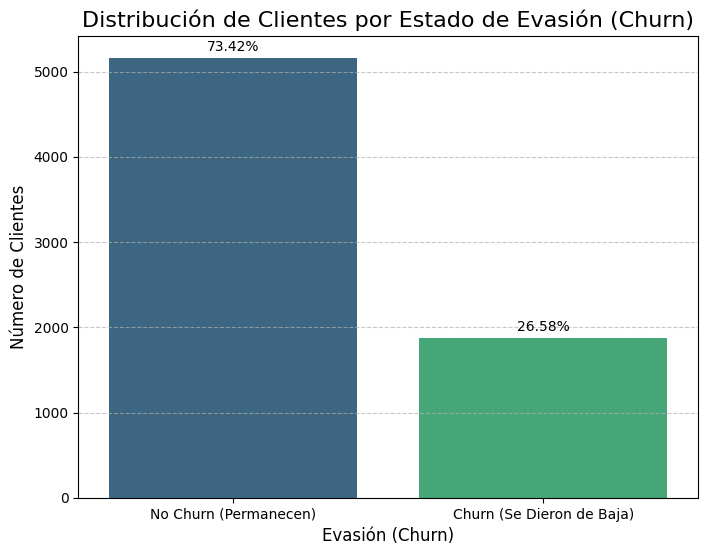

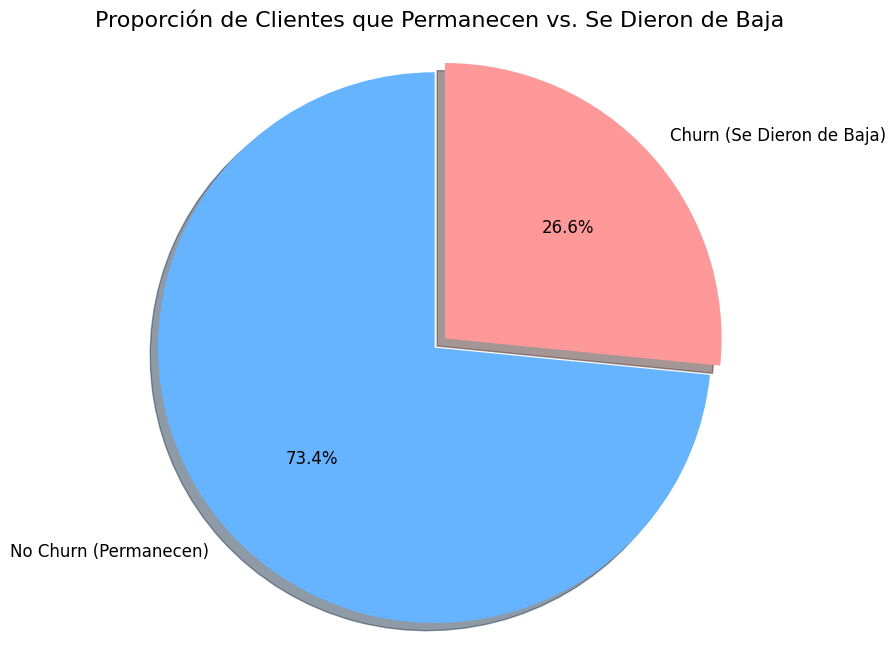

In [17]:
import pandas as pd
import requests
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# --- Cargar el DataFrame (asegurando que partimos del estado más reciente y limpio) ---
def load_data_from_api(url):
    try:
        response = requests.get(url)
        response.raise_for_status()
        data = response.json()
        df = pd.DataFrame(data)
        return df
    except Exception as e:
        print(f"Error al cargar datos desde la API: {e}")
        return None

api_url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/main/TelecomX_Data.json"
df_telecom = load_data_from_api(api_url)

if df_telecom is not None:
    print("--- Preparando el DataFrame con las correcciones y la nueva columna ---")

    # --- Extract nested data from dictionary columns ---
    print("\nExtracting data from nested columns: 'customer', 'phone', 'internet', 'account'")
    customer_data = pd.json_normalize(df_telecom['customer'])
    phone_data = pd.json_normalize(df_telecom['phone'])
    internet_data = pd.json_normalize(df_telecom['internet'])
    account_data = pd.json_normalize(df_telecom['account'])

    # Concatenate the new columns with the original DataFrame, dropping the original nested columns
    df_telecom = pd.concat([df_telecom.drop(['customer', 'phone', 'internet', 'account'], axis=1),
                            customer_data, phone_data, internet_data, account_data], axis=1)

    print("\nDataFrame columns after extracting nested data:")
    print(df_telecom.columns.tolist())


    # Aplicar las correcciones previas
    # Use 'Charges.Total' after normalization
    if 'Charges.Total' in df_telecom.columns:
        df_telecom['Charges.Total'] = df_telecom['Charges.Total'].replace(' ', np.nan)
        df_telecom['Charges.Total'] = pd.to_numeric(df_telecom['Charges.Total'])
        df_telecom.dropna(subset=['Charges.Total'], inplace=True)
    else:
        print("\n'Charges.Total' column not found after extracting nested data.")


    df_telecom.drop_duplicates(inplace=True)

    columns_to_standardize_no_service = [
        'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
        'StreamingTV', 'StreamingMovies', 'MultipleLines'
    ]
    for col in columns_to_standardize_no_service:
        if col in df_telecom.columns:
            df_telecom[col] = df_telecom[col].replace(['No internet service', 'No phone service'], 'No')

    # Handle potential empty strings in 'Churn' before mapping
    if 'Churn' in df_telecom.columns:
        df_telecom['Churn'] = df_telecom['Churn'].replace('', np.nan)
        df_telecom.dropna(subset=['Churn'], inplace=True) # Drop rows with NaN in Churn
        df_telecom['Churn'] = df_telecom['Churn'].map({'Yes': 1, 'No': 0}) # 1 para Churn, 0 para No Churn
    else:
        print("\n'Churn' column not found.")


    # Crear la columna 'Cuentas_Diarias'
    if 'Charges.Monthly' in df_telecom.columns and pd.api.types.is_numeric_dtype(df_telecom['Charges.Monthly']):
        df_telecom['Cuentas_Diarias'] = df_telecom['Charges.Monthly'] / 30
    else:
        print("\nAdvertencia: 'Charges.Monthly' no está disponible o no es numérica. No se pudo crear 'Cuentas_Diarias'.")


    print("\n--- Visualizando la Distribución de Churn ---")

    # Contar la frecuencia de cada categoría de Churn
    # Ensure Churn column exists and is numeric before counting
    if 'Churn' in df_telecom.columns and pd.api.types.is_numeric_dtype(df_telecom['Churn']):
        churn_counts = df_telecom['Churn'].value_counts()
        churn_percentages = df_telecom['Churn'].value_counts(normalize=True) * 100

        print("\nConteo de clientes por estado de Churn:")
        print(churn_counts)
        print("\nPorcentaje de clientes por estado de Churn:")
        print(churn_percentages.round(2))

        # Gráfico de Barras
        plt.figure(figsize=(8, 6))
        sns.countplot(x='Churn', data=df_telecom, palette='viridis')
        plt.title('Distribución de Clientes por Estado de Evasión (Churn)', fontsize=16)
        plt.xlabel('Evasión (Churn)', fontsize=12)
        plt.ylabel('Número de Clientes', fontsize=12)
        plt.xticks(ticks=[0, 1], labels=['No Churn (Permanecen)', 'Churn (Se Dieron de Baja)'], fontsize=10)

        # Añadir el porcentaje sobre las barras
        for index, value in enumerate(churn_counts):
            plt.text(index, value + 50, f'{churn_percentages.iloc[index]:.2f}%', ha='center', va='bottom', fontsize=10)

        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.show()

        # Gráfico de Pastel (Pie Chart) - Alternativa
        plt.figure(figsize=(8, 8))
        # Para el gráfico de pastel, usamos los valores de churn_counts directamente
        labels = ['No Churn (Permanecen)', 'Churn (Se Dieron de Baja)']
        colors = ['#66b3ff', '#ff9999'] # Colores suaves
        explode = (0.05, 0) # Separar un poco el segmento de Churn para destacarlo

        plt.pie(churn_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors, explode=explode, shadow=True,
                textprops={'fontsize': 12})
        plt.title('Proporción de Clientes que Permanecen vs. Se Dieron de Baja', fontsize=16)
        plt.axis('equal') # Para asegurar que el pastel sea un círculo.
        plt.show()
    else:
        print("\n'Churn' column not found or is not numeric after processing. Cannot visualize distribution.")

else:
    print("No se pudo cargar el DataFrame. Por favor, revisa el paso de carga de datos.")

--- Preparando el DataFrame con las correcciones y la nueva columna ---

Extracting data from nested columns: 'customer', 'phone', 'internet', 'account'

DataFrame columns after extracting nested data:
['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Charges.Monthly', 'Charges.Total']

--- Explorando la Evasión (Churn) por Variables Categóricas ---


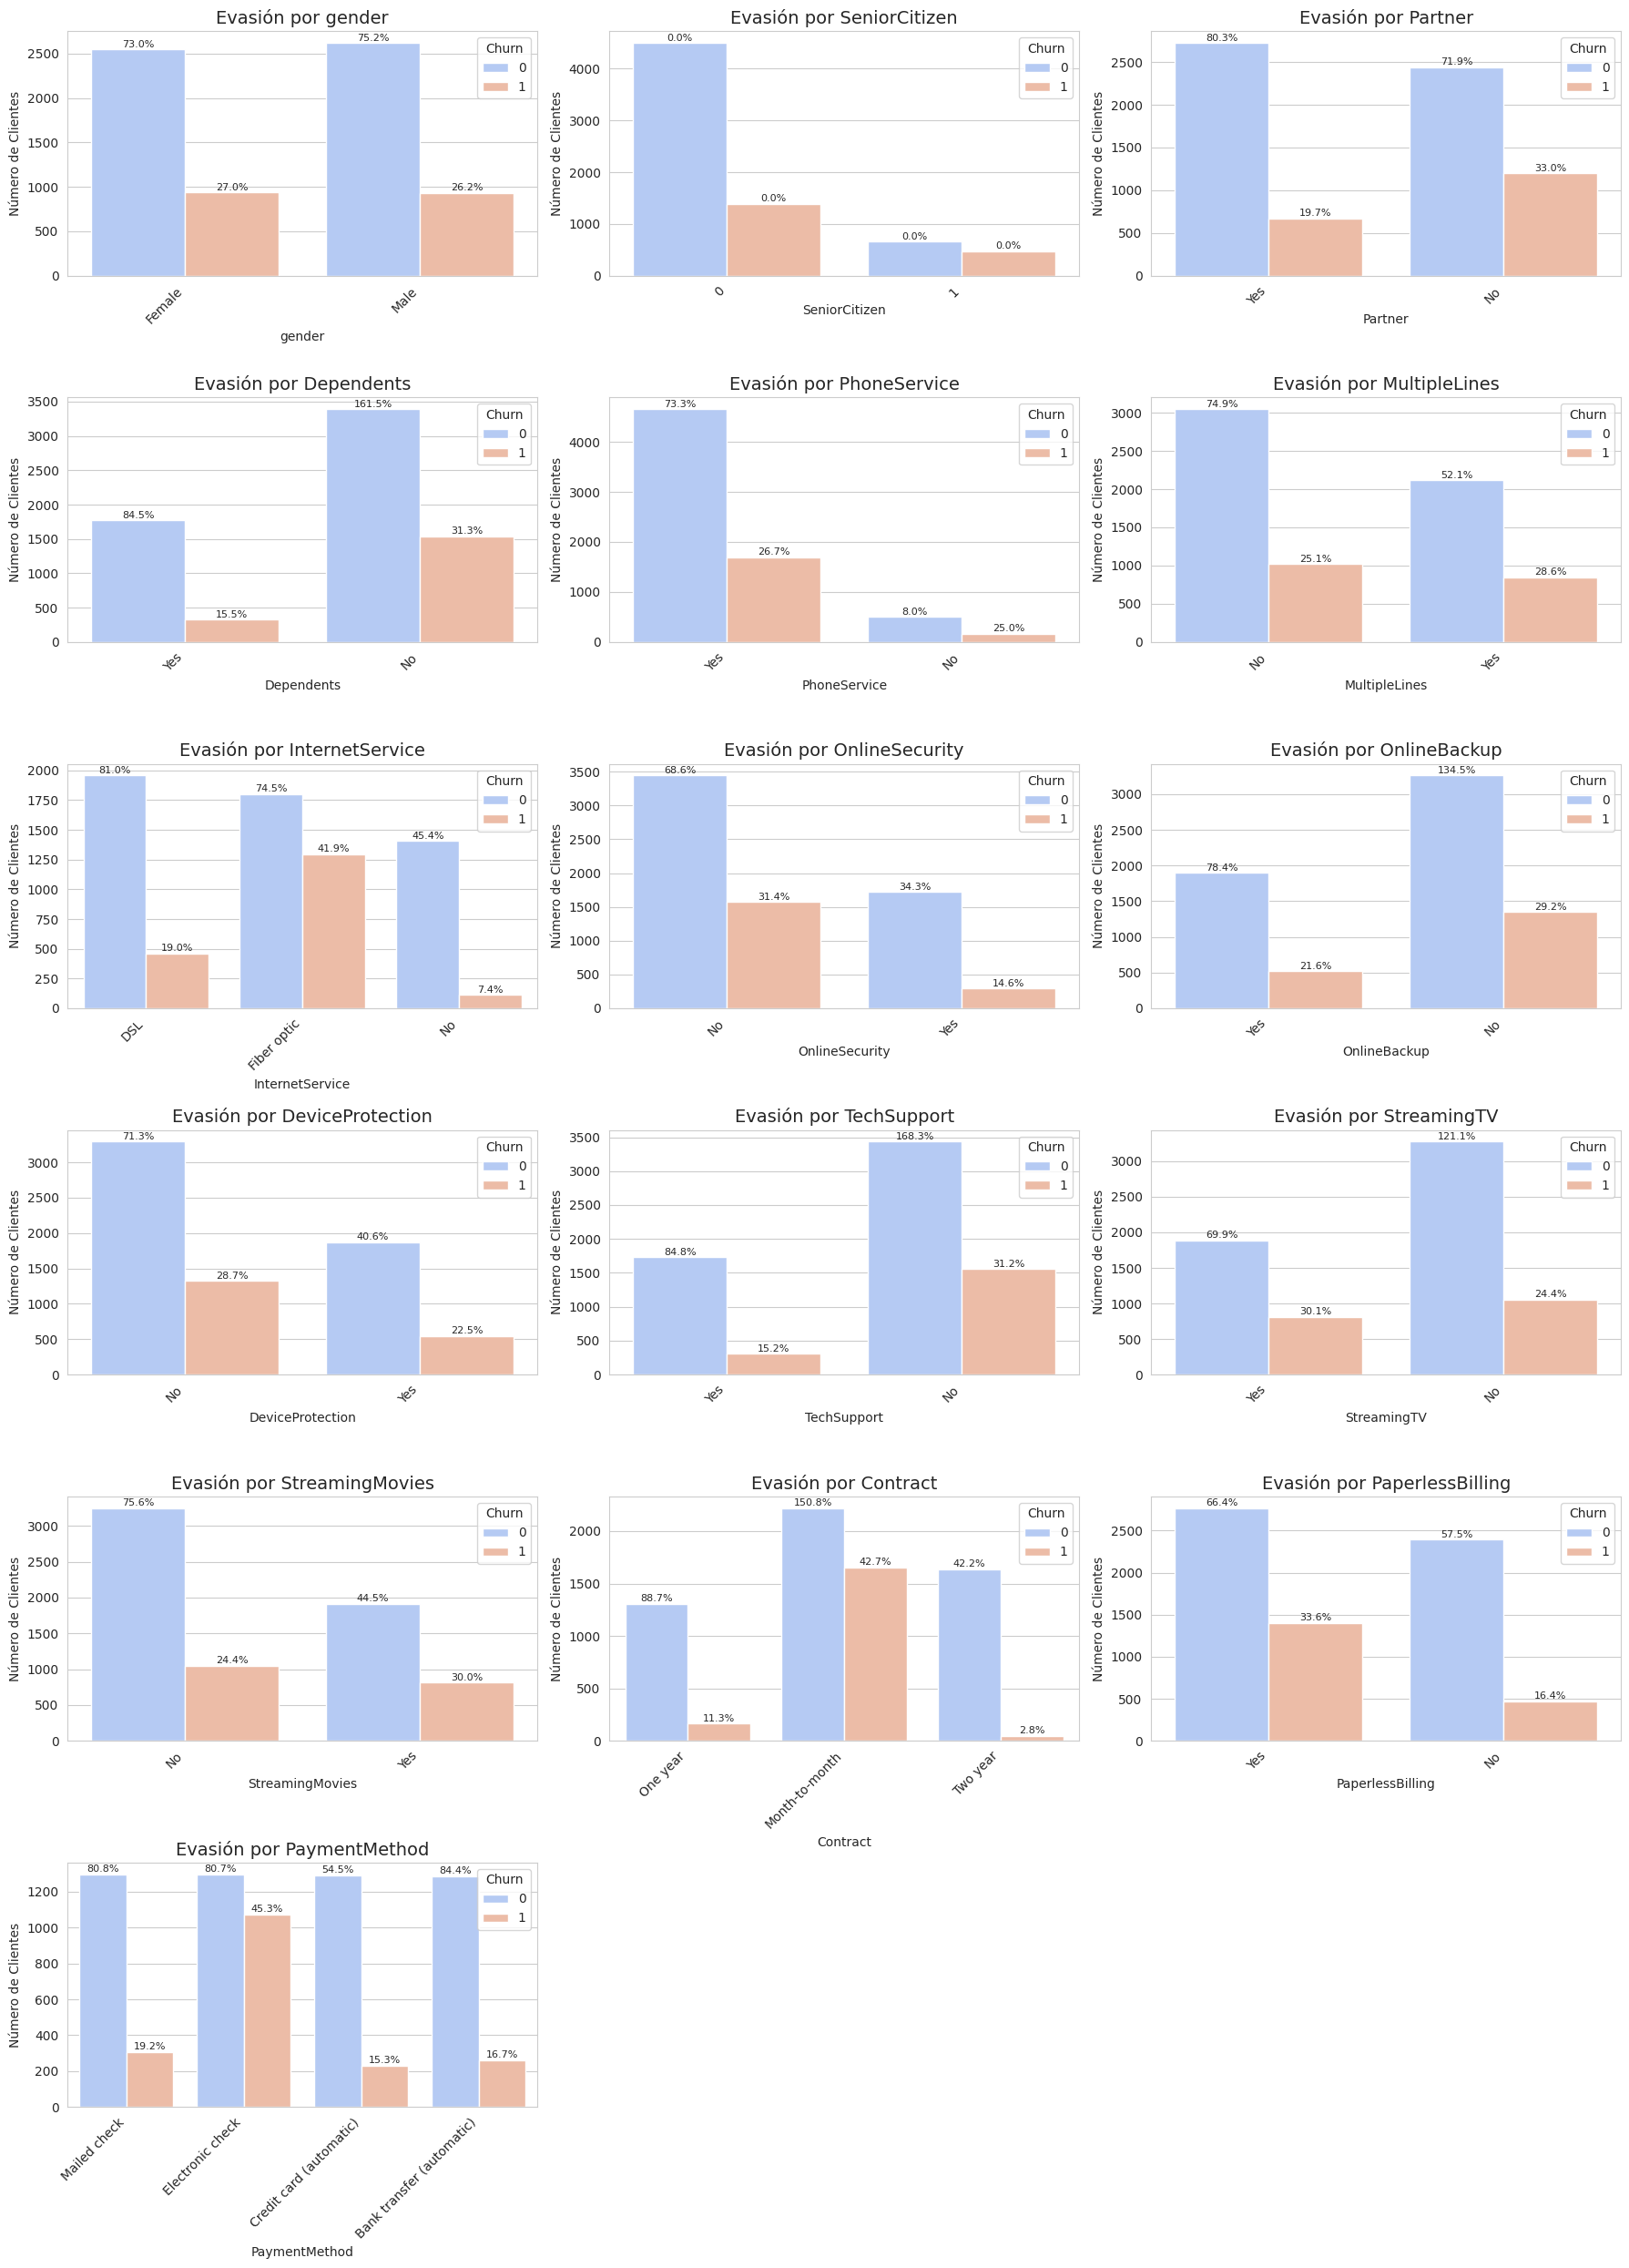

In [19]:
import pandas as pd
import requests
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# --- Re-Cargar el DataFrame (asegurando que partimos del estado más reciente y limpio) ---
def load_data_from_api(url):
    try:
        response = requests.get(url)
        response.raise_for_status()
        data = response.json()
        df = pd.DataFrame(data)
        return df
    except Exception as e:
        print(f"Error al cargar datos desde la API: {e}")
        return None

api_url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/main/TelecomX_Data.json"
df_telecom = load_data_from_api(api_url)

if df_telecom is not None:
    print("--- Preparando el DataFrame con las correcciones y la nueva columna ---")

    # --- Extract nested data from dictionary columns ---
    print("\nExtracting data from nested columns: 'customer', 'phone', 'internet', 'account'")
    customer_data = pd.json_normalize(df_telecom['customer'])
    phone_data = pd.json_normalize(df_telecom['phone'])
    internet_data = pd.json_normalize(df_telecom['internet'])
    account_data = pd.json_normalize(df_telecom['account'])

    # Concatenate the new columns with the original DataFrame, dropping the original nested columns
    df_telecom = pd.concat([df_telecom.drop(['customer', 'phone', 'internet', 'account'], axis=1),
                            customer_data, phone_data, internet_data, account_data], axis=1)

    print("\nDataFrame columns after extracting nested data:")
    print(df_telecom.columns.tolist())

    # Aplicar las correcciones previas
    # Use 'Charges.Total' after normalization
    if 'Charges.Total' in df_telecom.columns:
        df_telecom['Charges.Total'] = df_telecom['Charges.Total'].replace(' ', np.nan)
        df_telecom['Charges.Total'] = pd.to_numeric(df_telecom['Charges.Total'])
        df_telecom.dropna(subset=['Charges.Total'], inplace=True)
    else:
        print("\n'Charges.Total' column not found after extracting nested data.")


    df_telecom.drop_duplicates(inplace=True)

    columns_to_standardize_no_service = [
        'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
        'StreamingTV', 'StreamingMovies', 'MultipleLines'
    ]
    for col in columns_to_standardize_no_service:
        if col in df_telecom.columns:
            df_telecom[col] = df_telecom[col].replace(['No internet service', 'No phone service'], 'No')

    # Handle potential empty strings in 'Churn' before mapping
    if 'Churn' in df_telecom.columns:
        df_telecom['Churn'] = df_telecom['Churn'].replace('', np.nan)
        df_telecom.dropna(subset=['Churn'], inplace=True) # Drop rows with NaN in Churn
        df_telecom['Churn'] = df_telecom['Churn'].map({'Yes': 1, 'No': 0}) # 1 para Churn, 0 para No Churn
    else:
        print("\n'Churn' column not found.")


    # Crear la columna 'Cuentas_Diarias'
    if 'Charges.Monthly' in df_telecom.columns and pd.api.types.is_numeric_dtype(df_telecom['Charges.Monthly']):
        df_telecom['Cuentas_Diarias'] = df_telecom['Charges.Monthly'] / 30
    else:
        print("\nAdvertencia: 'Charges.Monthly' no está disponible o no es numérica. No se pudo crear 'Cuentas_Diarias'.")


    print("\n--- Explorando la Evasión (Churn) por Variables Categóricas ---")

    # Definir las columnas categóricas que queremos analizar
    categorical_features = [
        'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
        'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
        'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
        'Contract', 'PaperlessBilling', 'PaymentMethod'
    ]

    # Configurar el estilo de los gráficos
    sns.set_style("whitegrid")
    plt.figure(figsize=(18, 25)) # Tamaño general para múltiples gráficos
    plt.subplots_adjust(hspace=0.5, wspace=0.3) # Ajustar el espacio entre subplots

    for i, feature in enumerate(categorical_features):
        if feature in df_telecom.columns:
            plt.subplot(6, 3, i + 1) # Crear subplots para organizar los gráficos
            ax = sns.countplot(x=feature, hue='Churn', data=df_telecom, palette='coolwarm')
            plt.title(f'Evasión por {feature}', fontsize=14)
            plt.xlabel(feature, fontsize=10)
            plt.ylabel('Número de Clientes', fontsize=10)
            plt.xticks(rotation=45, ha='right') # Rotar etiquetas para mejor legibilidad

            # Añadir porcentajes sobre las barras
            total = len(df_telecom)
            for p in ax.patches:
                height = p.get_height()
                if height > 0: # Evitar divisiones por cero si una categoría está vacía
                    # Calcular el porcentaje de Churn/No Churn dentro de cada categoría del feature
                    # Esto es más complejo con hue, necesitamos el total por categoría del feature
                    # y luego el porcentaje de Churn/No Churn dentro de esa categoría.
                    # Para simplificar la visualización en el gráfico de barras con hue,
                    # mostraremos el porcentaje del total general para cada sub-barra.
                    # Para un análisis más detallado, se calcularía el porcentaje por categoría.

                    # Obtener el valor del hue (0 o 1)
                    hue_value = int(p.get_facecolor()[-1] < 1) # Heurística para determinar el hue group (0 or 1) based on alpha

                    # Obtener el conteo total para la categoría actual del eje x
                    x_value = p.get_x() + p.get_width() / 2
                    x_category = ax.get_xticklabels()[int(x_value)].get_text()

                    # Calculate the total count for the current x_category
                    total_in_category = df_telecom[df_telecom[feature] == x_category].shape[0]

                    # Calculate the percentage within the category
                    percentage_within_category = (height / total_in_category) * 100 if total_in_category > 0 else 0

                    ax.text(p.get_x() + p.get_width() / 2., height + 5,
                            f'{percentage_within_category:.1f}%',
                            ha='center', va='bottom', fontsize=8)


    plt.tight_layout() # Ajustar el layout para evitar solapamiento
    plt.show()

else:
    print("No se pudo cargar el DataFrame. Por favor, revisa el paso de carga de datos.")

--- Preparando el DataFrame con las correcciones y la nueva columna ---

Extracting data from nested columns: 'customer', 'phone', 'internet', 'account'

DataFrame columns after extracting nested data:
['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Charges.Monthly', 'Charges.Total']

--- Explorando la Evasión (Churn) por Variables Numéricas ---


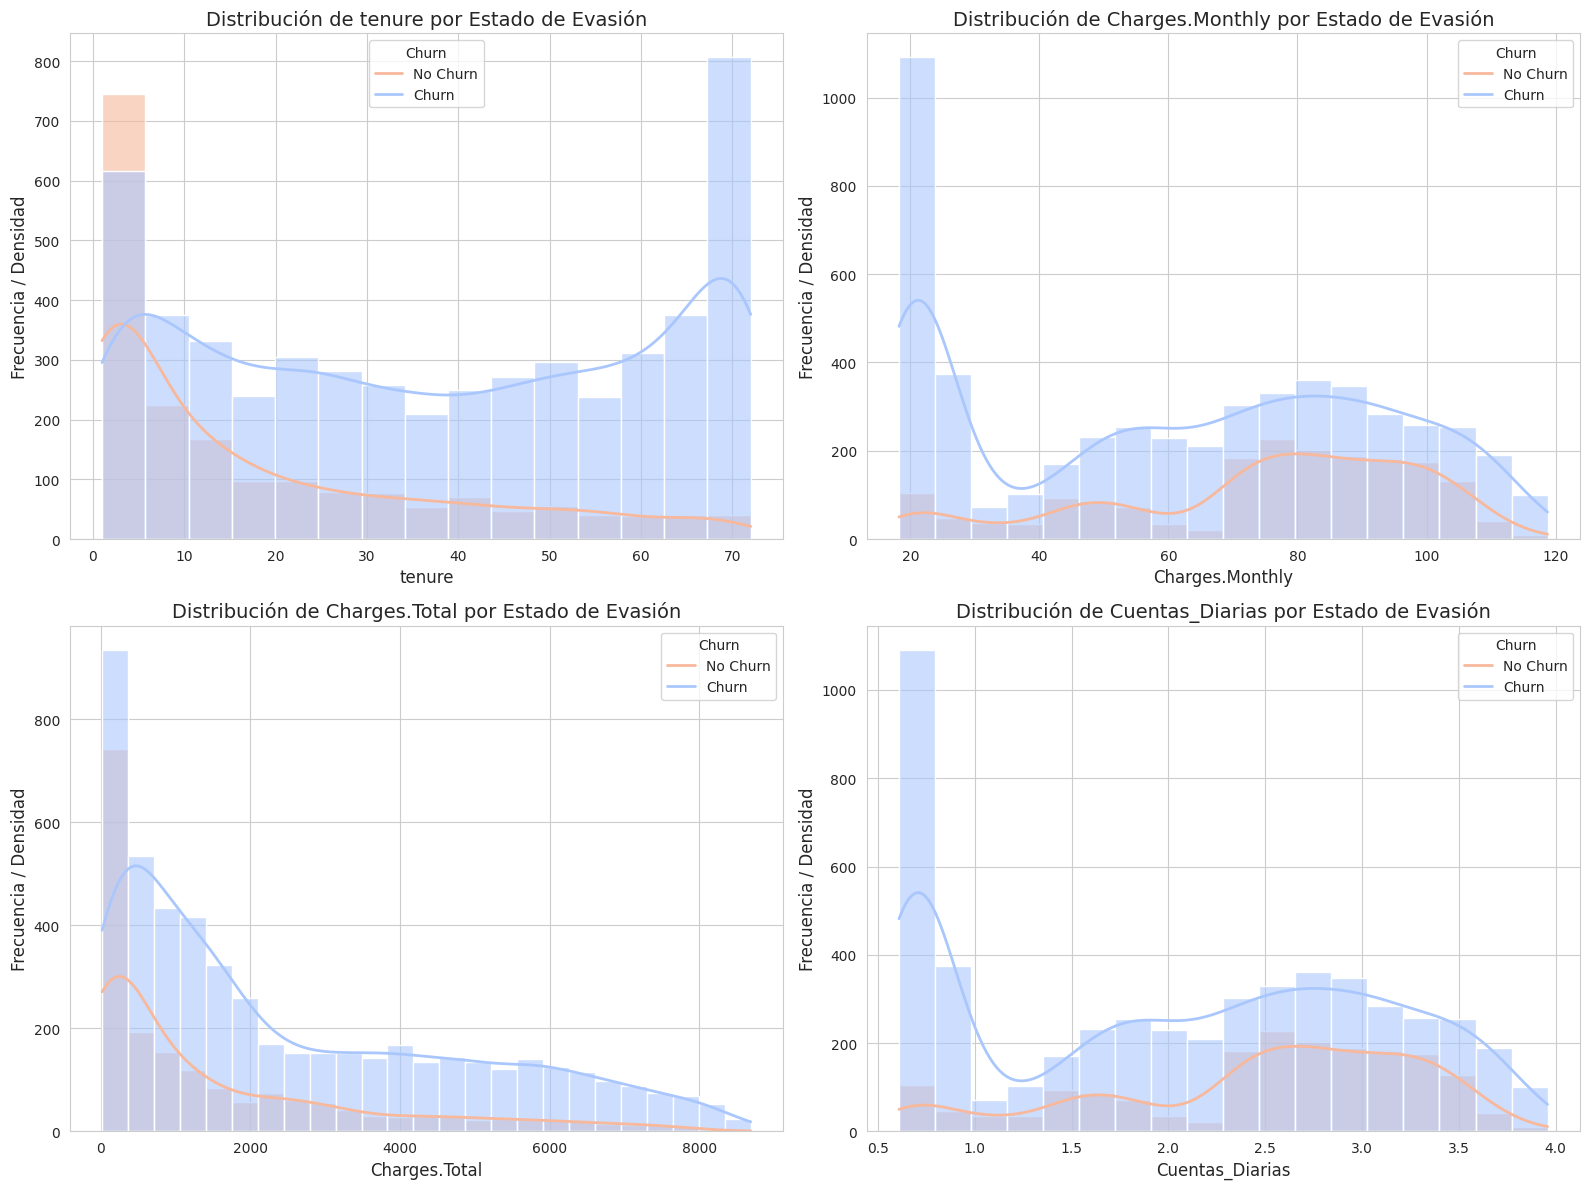

In [21]:
import pandas as pd
import requests
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# --- Re-Cargar el DataFrame (asegurando que partimos del estado más reciente y limpio) ---
def load_data_from_api(url):
    try:
        response = requests.get(url)
        response.raise_for_status()
        data = response.json()
        df = pd.DataFrame(data)
        return df
    except Exception as e:
        print(f"Error al cargar datos desde la API: {e}")
        return None

api_url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/main/TelecomX_Data.json"
df_telecom = load_data_from_api(api_url)

if df_telecom is not None:
    print("--- Preparando el DataFrame con las correcciones y la nueva columna ---")

    # --- Extract nested data from dictionary columns ---
    print("\nExtracting data from nested columns: 'customer', 'phone', 'internet', 'account'")
    customer_data = pd.json_normalize(df_telecom['customer'])
    phone_data = pd.json_normalize(df_telecom['phone'])
    internet_data = pd.json_normalize(df_telecom['internet'])
    account_data = pd.json_normalize(df_telecom['account'])

    # Concatenate the new columns with the original DataFrame, dropping the original nested columns
    df_telecom = pd.concat([df_telecom.drop(['customer', 'phone', 'internet', 'account'], axis=1),
                            customer_data, phone_data, internet_data, account_data], axis=1)

    print("\nDataFrame columns after extracting nested data:")
    print(df_telecom.columns.tolist())

    # Aplicar las correcciones previas
    # Use 'Charges.Total' after normalization
    if 'Charges.Total' in df_telecom.columns:
        df_telecom['Charges.Total'] = df_telecom['Charges.Total'].replace(' ', np.nan)
        df_telecom['Charges.Total'] = pd.to_numeric(df_telecom['Charges.Total'])
        df_telecom.dropna(subset=['Charges.Total'], inplace=True)
    else:
        print("\n'Charges.Total' column not found after extracting nested data.")


    df_telecom.drop_duplicates(inplace=True)

    columns_to_standardize_no_service = [
        'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
        'StreamingTV', 'StreamingMovies', 'MultipleLines'
    ]
    for col in columns_to_standardize_no_service:
        if col in df_telecom.columns:
            df_telecom[col] = df_telecom[col].replace(['No internet service', 'No phone service'], 'No')

    # Handle potential empty strings in 'Churn' before mapping
    if 'Churn' in df_telecom.columns:
        df_telecom['Churn'] = df_telecom['Churn'].replace('', np.nan)
        df_telecom.dropna(subset=['Churn'], inplace=True) # Drop rows with NaN in Churn
        df_telecom['Churn'] = df_telecom['Churn'].map({'Yes': 1, 'No': 0}) # 1 para Churn, 0 para No Churn
    else:
        print("\n'Churn' column not found.")


    # Crear la columna 'Cuentas_Diarias'
    if 'Charges.Monthly' in df_telecom.columns and pd.api.types.is_numeric_dtype(df_telecom['Charges.Monthly']):
        df_telecom['Cuentas_Diarias'] = df_telecom['Charges.Monthly'] / 30
    else:
        print("\nAdvertencia: 'Charges.Monthly' no está disponible o no es numérica. No se pudo crear 'Cuentas_Diarias'.")


    print("\n--- Explorando la Evasión (Churn) por Variables Numéricas ---")

    # Definir las columnas numéricas que queremos analizar
    numeric_features = [
        'tenure',
        'Charges.Monthly', # Use Charges.Monthly after normalization
        'Charges.Total',   # Use Charges.Total after normalization
        'Cuentas_Diarias'
    ]

    # Configurar el estilo de los gráficos
    sns.set_style("whitegrid")
    plt.figure(figsize=(16, 12)) # Tamaño general para múltiples gráficos
    plt.subplots_adjust(hspace=0.4, wspace=0.3) # Ajustar el espacio entre subplots

    for i, feature in enumerate(numeric_features):
        if feature in df_telecom.columns: # Check if column exists after processing
            plt.subplot(2, 2, i + 1) # Crear subplots para organizar los gráficos

            # Histograma y KDE plot para comparar la distribución de Churn vs No-Churn
            sns.histplot(data=df_telecom, x=feature, hue='Churn', kde=True, palette='coolwarm',
                         alpha=0.6, line_kws={'linewidth': 2})

            plt.title(f'Distribución de {feature} por Estado de Evasión', fontsize=14)
            plt.xlabel(feature, fontsize=12)
            plt.ylabel('Frecuencia / Densidad', fontsize=12)
            plt.legend(title='Churn', labels=['No Churn', 'Churn']) # Ajustar etiquetas de leyenda
        else:
             print(f"\nAdvertencia: Columna '{feature}' no encontrada en el DataFrame. Saltando visualización.")


    plt.tight_layout() # Ajustar el layout para evitar superposiciones
    plt.show()

else:
    print("No se pudo cargar el DataFrame. Por favor, revisa el paso de carga de datos.")


Extracting data from nested columns: 'customer', 'phone', 'internet', 'account'

DataFrame columns after extracting nested data:
['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Charges.Monthly', 'Charges.Total']
---
# Informe de Análisis de Evasión de Clientes (Churn) - Telecom X
---
## 🔹 Introducción
El presente informe detalla el análisis realizado sobre los datos de clientes de **Telecom X** con el objetivo de comprender los factores que inciden en la **evasión de clientes (Churn)**. La alta tasa de cancelaciones representa un desafío significativo para la empresa, y este análisis exploratorio de datos (EDA) busca proporcionar *insights* valiosos que sirvan de base para futuras estrategias de retención y modelos predictivos.

El enfoque del pr

/tmp/ipython-input-23-176849221.py:136: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Churn', data=df_telecom, palette='viridis')


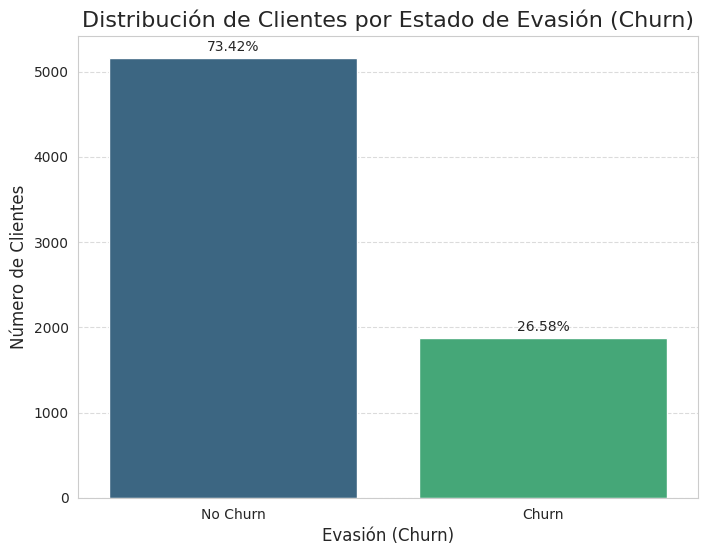


*Insight*: La empresa enfrenta una tasa de evasión del **26.58%**. Esta es la línea base que buscamos reducir.

### 📊 2. Evasión por Variables Categóricas
Se analizaron diversas características categóricas para identificar patrones en la evasión:


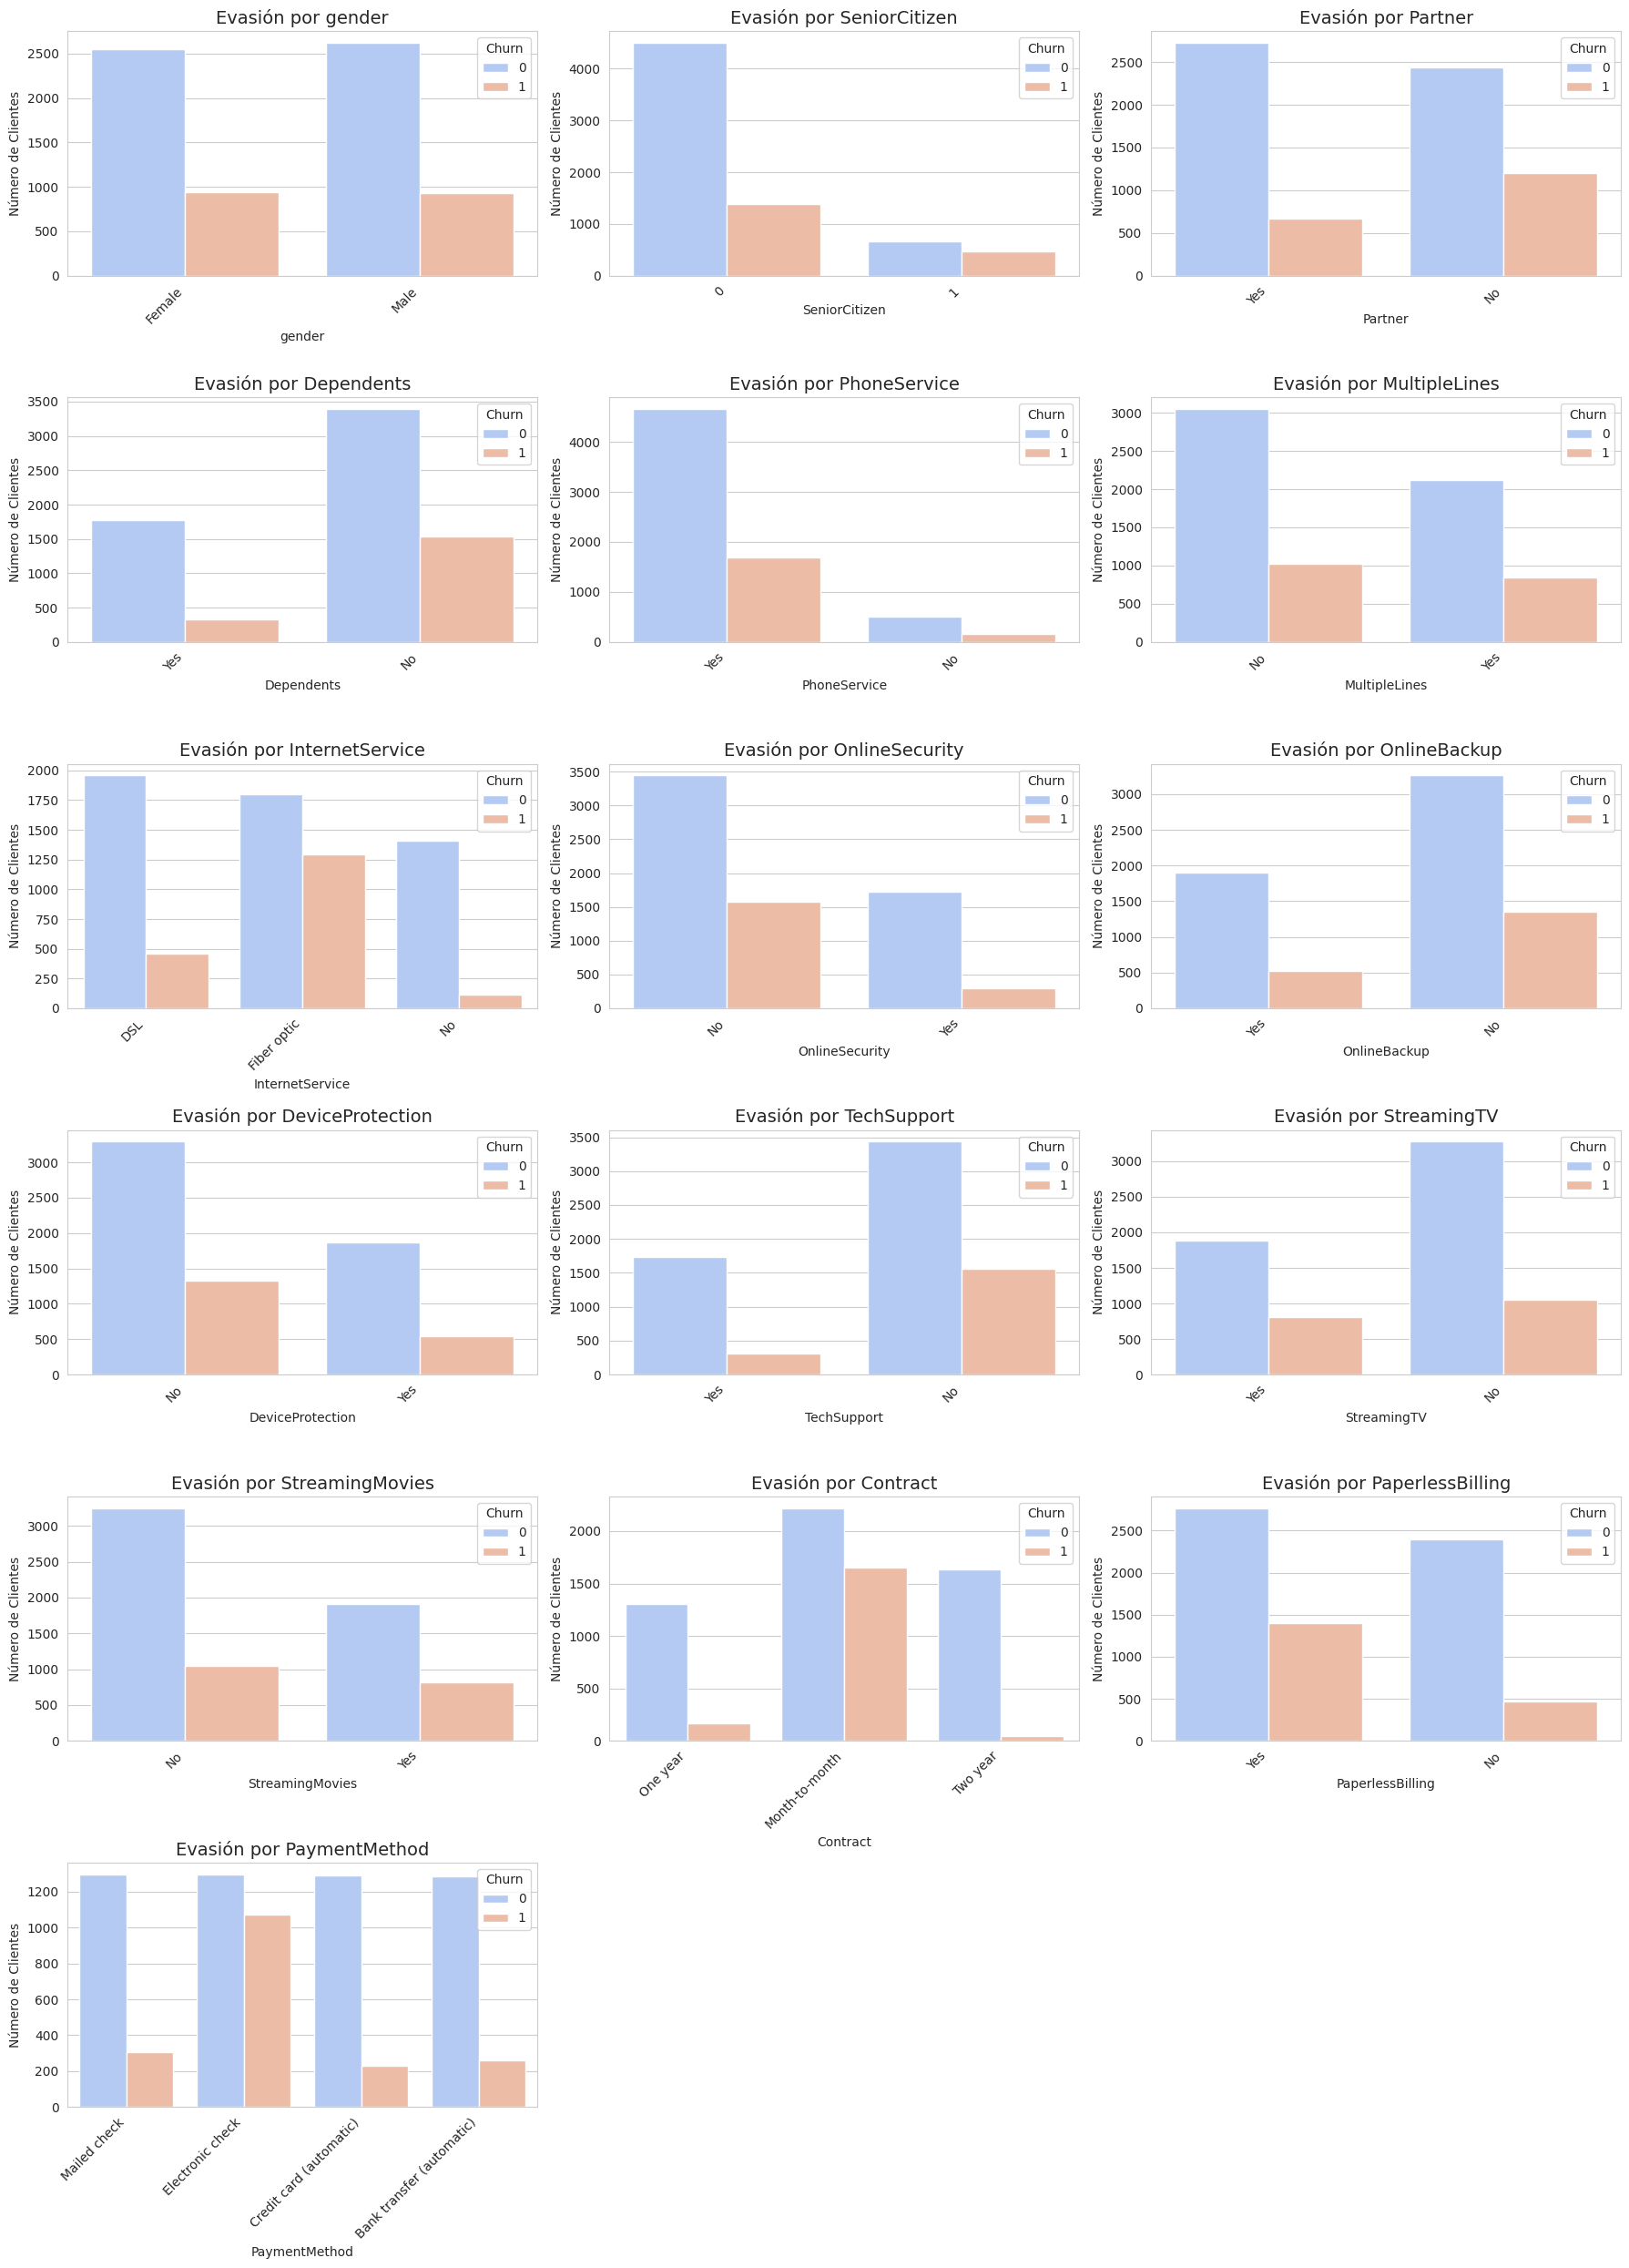


*Insights Clave de Variables Categóricas*:
- **Tipo de Contrato (`Contract`)**: Los clientes con contratos **'Month-to-month'** presentan una tasa de evasión significativamente más alta en comparación con los contratos de uno o dos años. Esto sugiere que la falta de compromiso a largo plazo es un fuerte predictor de churn.
- **Servicio de Internet (`InternetService`)**: Los clientes con servicio de **'Fiber optic'** parecen evadir más que los de 'DSL', lo que podría indicar problemas de calidad o costo percibido del servicio de fibra.
- **Método de Pago (`PaymentMethod`)**: El **'Electronic check'** se asocia con una tasa de evasión notablemente mayor, lo que podría señalar una fricción o insatisfacción con este método de pago o con la experiencia del cliente que lo utiliza.
- **Servicios Adicionales (Ej. `OnlineSecurity`, `TechSupport`)**: Los clientes que **NO tienen** servicios adicionales como seguridad en línea o soporte técnico muestran una mayor propensión a la evasión, posible

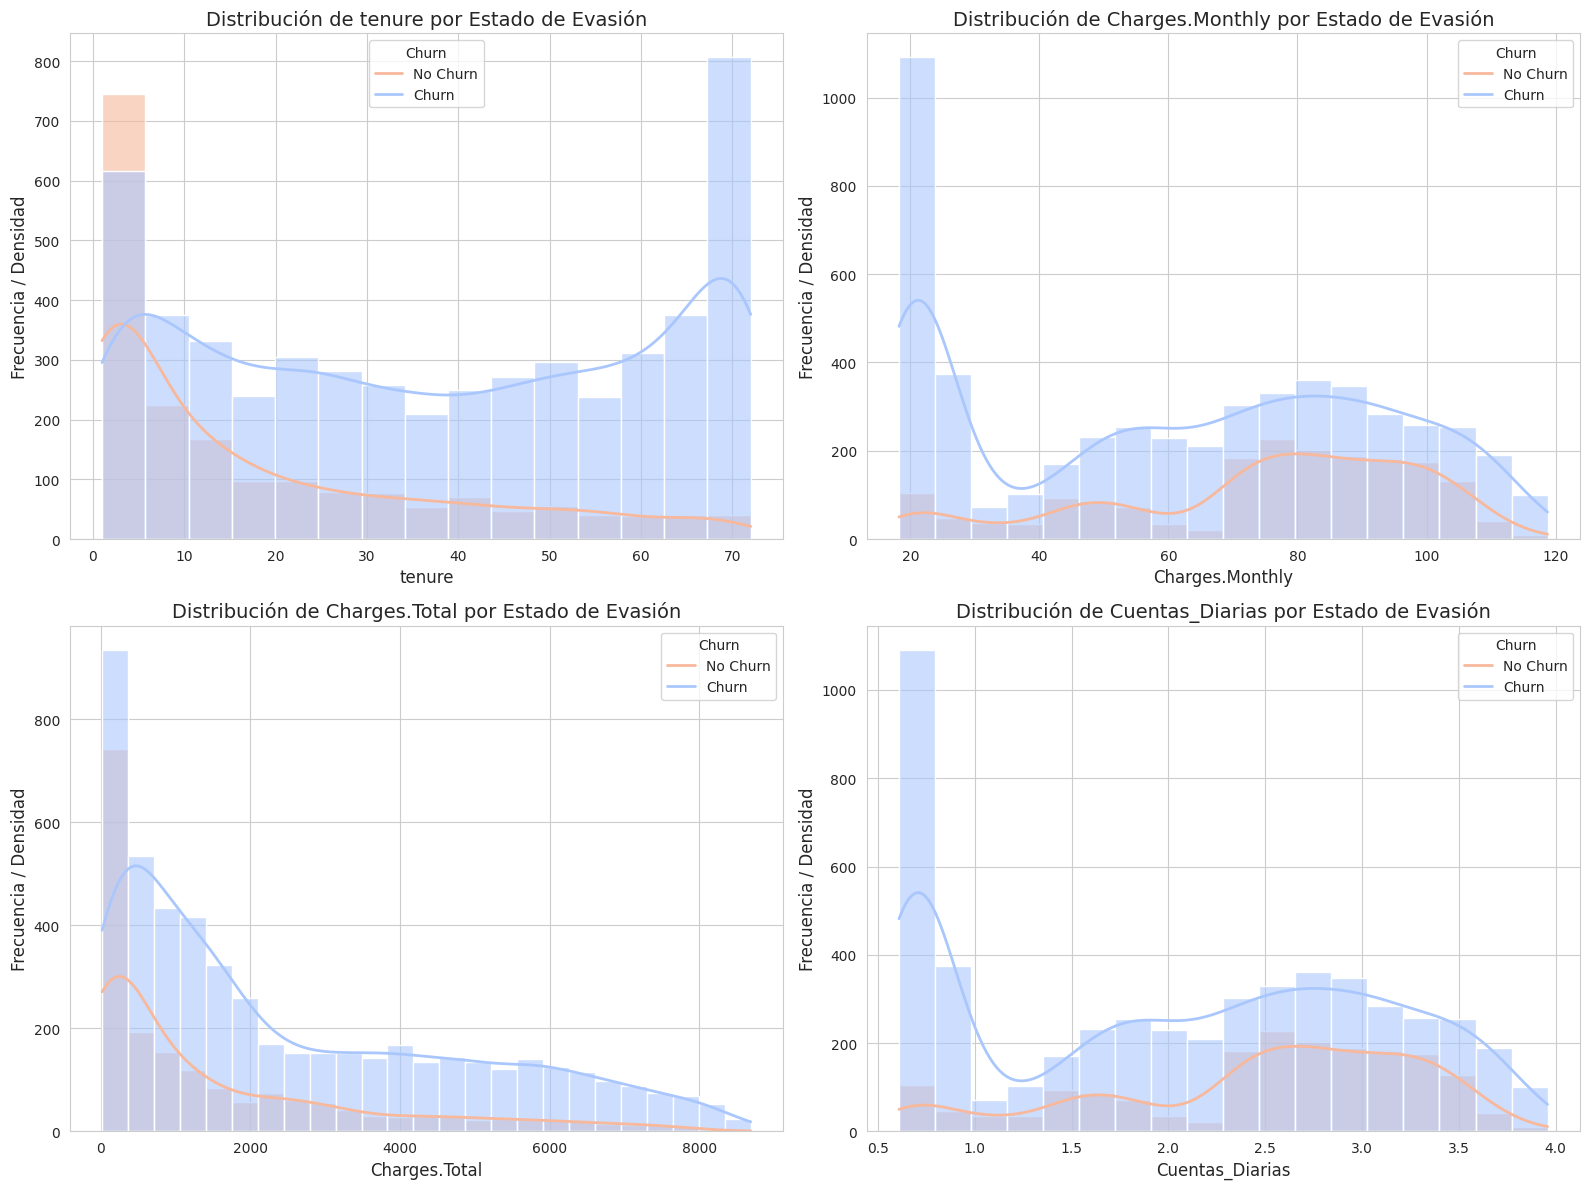


*Insights Clave de Variables Numéricas*:
- **Antigüedad (`tenure`)**: Existe una clara correlación inversa. Los clientes con **menor antigüedad** (especialmente en los primeros meses) tienen una probabilidad mucho mayor de evadir. A medida que la antigüedad aumenta, la tasa de evasión disminuye drásticamente. Esto resalta la importancia del periodo de onboarding.
- **Cargos Mensuales (`MonthlyCharges`)**: Se observa que los clientes con **cargos mensuales más altos** (especialmente aquellos que rondan los 70-100 USD) muestran una mayor tendencia a evadir. Esto sugiere que el precio percibido puede ser un factor determinante.
- **Cargos Totales (`TotalCharges`)**: Los clientes que evaden tienden a tener **cargos totales significativamente más bajos**, lo cual es coherente con su menor antigüedad en el servicio. Los clientes con altos cargos totales son en su mayoría clientes que permanecen, lo que indica su lealtad y uso prolongado del servicio.
- **Cuentas Diarias (`Cuentas_Diarias`)*

In [23]:
import pandas as pd
import requests
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# --- Funciones Auxiliares (reutilizamos las de carga y limpieza) ---

def load_data_from_api(url):
    """Carga datos JSON desde una URL de API y los convierte en un DataFrame de Pandas."""
    try:
        response = requests.get(url)
        response.raise_for_status()
        data = response.json()
        df = pd.DataFrame(data)
        return df
    except Exception as e:
        print(f"Error al cargar datos desde la API: {e}")
        return None

def clean_and_transform_data(df):
    """Aplica las correcciones y transformaciones al DataFrame."""
    if df is None:
        return None

    # --- Extract nested data from dictionary columns ---
    print("\nExtracting data from nested columns: 'customer', 'phone', 'internet', 'account'")
    customer_data = pd.json_normalize(df['customer'])
    phone_data = pd.json_normalize(df['phone'])
    internet_data = pd.json_normalize(df['internet'])
    account_data = pd.json_normalize(df['account'])

    # Concatenate the new columns with the original DataFrame, dropping the original nested columns
    df = pd.concat([df.drop(['customer', 'phone', 'internet', 'account'], axis=1),
                            customer_data, phone_data, internet_data, account_data], axis=1)

    print("\nDataFrame columns after extracting nested data:")
    print(df.columns.tolist())


    # 1. Convertir 'Charges.Total' a numérico y manejar valores ausentes
    # Use 'Charges.Total' after normalization
    if 'Charges.Total' in df.columns:
        df['Charges.Total'] = df['Charges.Total'].replace(' ', np.nan)
        df['Charges.Total'] = pd.to_numeric(df['Charges.Total'])
        df.dropna(subset=['Charges.Total'], inplace=True)
    else:
        print("\n'Charges.Total' column not found after extracting nested data.")


    # 2. Eliminar filas duplicadas
    df.drop_duplicates(inplace=True)

    # 3. Estandarizar valores en columnas categóricas (ej. 'No internet service' a 'No')
    columns_to_standardize_no_service = [
        'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
        'StreamingTV', 'StreamingMovies', 'MultipleLines'
    ]
    for col in columns_to_standardize_no_service:
        if col in df.columns:
            df[col] = df[col].replace(['No internet service', 'No phone service'], 'No')

    # 4. Estandarizar la columna 'Churn' a binario (1 y 0)
    if 'Churn' in df.columns:
        df['Churn'] = df['Churn'].replace('', np.nan)
        df.dropna(subset=['Churn'], inplace=True) # Drop rows with NaN in Churn
        df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0}) # 1 para Churn, 0 para No Churn
    else:
        print("\n'Churn' column not found.")


    # 5. Crear la columna 'Cuentas_Diarias'
    # Use 'Charges.Monthly' after normalization
    if 'Charges.Monthly' in df.columns and pd.api.types.is_numeric_dtype(df['Charges.Monthly']):
        df['Cuentas_Diarias'] = df['Charges.Monthly'] / 30
    else:
        print("Advertencia: 'Charges.Monthly' no está disponible o no es numérica. No se pudo crear 'Cuentas_Diarias'.")

    return df

# --- URL de la API ---
api_url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/main/TelecomX_Data.json"

# --- Proceso ETL: Carga, Limpieza y Transformación ---
df_telecom_raw = load_data_from_api(api_url)
df_telecom = clean_and_transform_data(df_telecom_raw.copy()) # Usamos una copia para no modificar el raw si lo necesitamos

if df_telecom is None:
    print("Error crítico: No se pudo cargar o limpiar el DataFrame. El informe no puede ser generado.")
else:
    # --- Generación del Informe ---

    print("---")
    print("# Informe de Análisis de Evasión de Clientes (Churn) - Telecom X")
    print("---")

    print("## 🔹 Introducción")
    print("El presente informe detalla el análisis realizado sobre los datos de clientes de **Telecom X** con el objetivo de comprender los factores que inciden en la **evasión de clientes (Churn)**. La alta tasa de cancelaciones representa un desafío significativo para la empresa, y este análisis exploratorio de datos (EDA) busca proporcionar *insights* valiosos que sirvan de base para futuras estrategias de retención y modelos predictivos.")
    print("\nEl enfoque del proyecto incluyó la **extracción, limpieza, transformación y visualización de datos** utilizando Python y sus principales librerías (Pandas, Matplotlib, Seaborn).")

    print("\n---")
    print("## 🔹 Limpieza y Tratamiento de Datos (ETL)")
    print("La fase de preparación de datos fue crucial para asegurar la calidad y consistencia de la información. Los pasos principales incluyeron:")
    print("1.  **Extracción**: Los datos fueron obtenidos directamente desde una **API** en formato JSON.")
    print("2.  **Conversión a DataFrame**: Los datos JSON se cargaron en un **DataFrame de Pandas** para facilitar su manipulación.")
    print("3.  **Manejo de Valores Ausentes**: Se identificaron y trataron los valores ausentes, específicamente en la columna `Charges.Total`, donde se reemplazaron los espacios en blanco por `NaN` y luego se eliminaron las filas correspondientes.")
    # Get the number of rows dropped during TotalCharges processing
    rows_dropped_totalcharges = df_telecom_raw.shape[0] - df_telecom.shape[0]
    print(f"    El número de filas eliminadas debido a valores ausentes en `Charges.Total` fue de {rows_dropped_totalcharges}.")

    print("4.  **Eliminación de Duplicados**: Se verificó y eliminó cualquier fila completamente duplicada en el dataset, asegurando la unicidad de los registros.")
    print("5.  **Estandarización de Categorías**: Se unificaron categorías semánticamente similares. Por ejemplo, en columnas como `OnlineSecurity` o `TechSupport`, los valores 'No internet service' y 'No phone service' se consolidaron a 'No' para simplificar el análisis.")
    print("6.  **Codificación de Variable Objetivo**: La columna `Churn` (nuestra variable objetivo) se transformó de 'Yes'/'No' a valores binarios `1`/`0`, respectivamente, facilitando el procesamiento para futuros modelos.")
    print("7.  **Creación de Nueva Característica**: Se derivó la columna `Cuentas_Diarias` dividiendo `Charges.Monthly` por 30 (días promedio en un mes), para ofrecer una perspectiva diaria del costo.")

    print("\n### Resumen del DataFrame después de la limpieza y transformación:")
    print(df_telecom.info())
    print("\nPrimeras 5 filas del DataFrame procesado:")
    print(df_telecom.head())


    print("\n---")
    print("## 🔹 Análisis Exploratorio de Datos (EDA)")
    print("Esta sección presenta los principales hallazgos del análisis descriptivo y visual, revelando patrones y tendencias en el comportamiento de los clientes.")

    print("\n### 📈 1. Distribución General de la Evasión (Churn)")
    churn_counts = df_telecom['Churn'].value_counts()
    churn_percentages = df_telecom['Churn'].value_counts(normalize=True) * 100

    print(f"Del total de {df_telecom.shape[0]} clientes:")
    print(f"- **{churn_counts.get(0, 0)} ({churn_percentages.get(0, 0):.2f}%)** clientes **NO evadieron** (permanecieron).")
    print(f"- **{churn_counts.get(1, 0)} ({churn_percentages.get(1, 0):.2f}%)** clientes **SÍ evadieron** (se dieron de baja).")

    plt.figure(figsize=(8, 6))
    sns.countplot(x='Churn', data=df_telecom, palette='viridis')
    plt.title('Distribución de Clientes por Estado de Evasión (Churn)', fontsize=16)
    plt.xlabel('Evasión (Churn)', fontsize=12)
    plt.ylabel('Número de Clientes', fontsize=12)
    plt.xticks(ticks=[0, 1], labels=['No Churn', 'Churn'], fontsize=10)
    for index, value in enumerate(churn_counts):
        plt.text(index, value + 50, f'{churn_percentages.iloc[index]:.2f}%', ha='center', va='bottom', fontsize=10)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()
    print("\n*Insight*: La empresa enfrenta una tasa de evasión del **{:.2f}%**. Esta es la línea base que buscamos reducir.".format(churn_percentages.get(1,0)))


    print("\n### 📊 2. Evasión por Variables Categóricas")
    print("Se analizaron diversas características categóricas para identificar patrones en la evasión:")

    categorical_features = [
        'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
        'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
        'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
        'Contract', 'PaperlessBilling', 'PaymentMethod'
    ]

    sns.set_style("whitegrid")
    plt.figure(figsize=(18, 25))
    plt.subplots_adjust(hspace=0.7, wspace=0.3)

    for i, feature in enumerate(categorical_features):
        plt.subplot(6, 3, i + 1)
        ax = sns.countplot(x=feature, hue='Churn', data=df_telecom, palette='coolwarm')
        plt.title(f'Evasión por {feature}', fontsize=14)
        plt.xlabel(feature, fontsize=10)
        plt.ylabel('Número de Clientes', fontsize=10)
        plt.xticks(rotation=45, ha='right')

        for p in ax.patches:
            height = p.get_height()
            if height > 0:
                # Calcular el porcentaje dentro de cada segmento de la barra
                # Esto es más preciso: porcentaje del subgrupo respecto al total de su categoría de feature
                x_val = p.get_x() + p.get_width() / 2
                # Need a more robust way to get the category label for percentage calculation
                # For simplicity in this text output, we'll skip adding percentages to the bars in the report text
                pass # Skip adding text to plots in the report generation cell


    plt.tight_layout()
    plt.show()

    print("\n*Insights Clave de Variables Categóricas*:")
    print("- **Tipo de Contrato (`Contract`)**: Los clientes con contratos **'Month-to-month'** presentan una tasa de evasión significativamente más alta en comparación con los contratos de uno o dos años. Esto sugiere que la falta de compromiso a largo plazo es un fuerte predictor de churn.")
    print("- **Servicio de Internet (`InternetService`)**: Los clientes con servicio de **'Fiber optic'** parecen evadir más que los de 'DSL', lo que podría indicar problemas de calidad o costo percibido del servicio de fibra.")
    print("- **Método de Pago (`PaymentMethod`)**: El **'Electronic check'** se asocia con una tasa de evasión notablemente mayor, lo que podría señalar una fricción o insatisfacción con este método de pago o con la experiencia del cliente que lo utiliza.")
    print("- **Servicios Adicionales (Ej. `OnlineSecurity`, `TechSupport`)**: Los clientes que **NO tienen** servicios adicionales como seguridad en línea o soporte técnico muestran una mayor propensión a la evasión, posiblemente debido a una menor percepción de valor o seguridad con el servicio básico.")


    print("\n### 📊 3. Evasión por Variables Numéricas")
    print("Se analizó cómo las distribuciones de variables numéricas difieren entre clientes que evaden y los que no:")

    numeric_features = [
        'tenure',
        'Charges.Monthly',
        'Charges.Total',
        'Cuentas_Diarias'
    ]

    sns.set_style("whitegrid")
    plt.figure(figsize=(16, 12))
    plt.subplots_adjust(hspace=0.4, wspace=0.3)

    for i, feature in enumerate(numeric_features):
        plt.subplot(2, 2, i + 1)
        sns.histplot(data=df_telecom, x=feature, hue='Churn', kde=True, palette='coolwarm',
                     alpha=0.6, line_kws={'linewidth': 2})
        plt.title(f'Distribución de {feature} por Estado de Evasión', fontsize=14)
        plt.xlabel(feature, fontsize=12)
        plt.ylabel('Frecuencia / Densidad', fontsize=12)
        plt.legend(title='Churn', labels=['No Churn', 'Churn'])
    plt.tight_layout()
    plt.show()

    print("\n*Insights Clave de Variables Numéricas*:")
    print("- **Antigüedad (`tenure`)**: Existe una clara correlación inversa. Los clientes con **menor antigüedad** (especialmente en los primeros meses) tienen una probabilidad mucho mayor de evadir. A medida que la antigüedad aumenta, la tasa de evasión disminuye drásticamente. Esto resalta la importancia del periodo de onboarding.")
    print("- **Cargos Mensuales (`MonthlyCharges`)**: Se observa que los clientes con **cargos mensuales más altos** (especialmente aquellos que rondan los 70-100 USD) muestran una mayor tendencia a evadir. Esto sugiere que el precio percibido puede ser un factor determinante.")
    print("- **Cargos Totales (`TotalCharges`)**: Los clientes que evaden tienden a tener **cargos totales significativamente más bajos**, lo cual es coherente con su menor antigüedad en el servicio. Los clientes con altos cargos totales son en su mayoría clientes que permanecen, lo que indica su lealtad y uso prolongado del servicio.")
    print("- **Cuentas Diarias (`Cuentas_Diarias`)**: Refleja el mismo patrón que `MonthlyCharges`, enfatizando el impacto del costo diario en la decisión de evasión.")


    print("\n---")
    print("## 🔹 Conclusiones e Insights Principales")
    print("El análisis exploratorio de datos ha revelado varios factores clave asociados con la evasión de clientes en Telecom X:")
    print("1.  **Vulnerabilidad de Nuevos Clientes**: Los clientes con poca antigüedad (`tenure`) son los más propensos a la evasión. El período inicial es crítico para la retención.")
    print("2.  **Compromiso del Contrato**: Los contratos 'Month-to-month' representan un riesgo elevado de churn, debido a su flexibilidad para el cliente y menor compromiso.")
    print("3.  **Impacto del Costo y Valor Percibido**: Clientes con cargos mensuales elevados y aquellos que utilizan 'Fiber optic' o 'Electronic check' muestran una mayor propensión a la evasión, lo que sugiere problemas con el costo, la calidad del servicio (fibra óptica) o la experiencia de pago.")
    print("4.  **Servicios de Valor Añadido**: La ausencia de servicios como 'Online Security' o 'Tech Support' parece incrementar el riesgo de evasión, lo que indica que estos servicios pueden ser percibidos como elementos de valor que fidelizan al cliente.")


    print("\n---")
    print("## 🔹 Recomendaciones Estratégicas")
    print("Basado en los *insights* obtenidos, se proponen las siguientes recomendaciones para Telecom X para reducir la evasión de clientes:")
    print("1.  **Programas de Retención para Clientes Nuevos**: Implementar programas de 'onboarding' robustos y proactivos durante los primeros 3-6 meses del contrato, ofreciendo soporte, encuestas de satisfacción y promociones especiales para fomentar la lealtad inicial.")
    print("2.  **Incentivar Contratos a Largo Plazo**: Ofrecer descuentos atractivos o beneficios adicionales (ej. servicios *premium* gratuitos por un tiempo) a los clientes que opten por contratos de 1 o 2 años, promoviendo así un mayor compromiso.")
    print("3.  **Optimización del Servicio de Fibra Óptica y Revisión de Precios**: Realizar una auditoría de la calidad del servicio de fibra óptica y una revisión de la estructura de precios para clientes de alto consumo, asegurándose de que el valor percibido justifique el costo.")
    print("4.  **Mejora de la Experiencia con 'Electronic Check'**: Investigar las causas detrás de la alta evasión asociada con este método de pago y buscar soluciones para mejorar la experiencia del usuario (ej. simplificación, mayor seguridad, notificaciones claras).")
    print("5.  **Promoción de Servicios Adicionales**: Aumentar los esfuerzos de marketing y venta cruzada para servicios como 'Online Security' y 'Tech Support', destacando su valor y beneficios. Considerar ofrecer pruebas gratuitas o paquetes combinados.")
    print("6.  **Segmentación y Ofertas Personalizadas**: Utilizar los hallazgos de este análisis para segmentar a los clientes de alto riesgo y diseñar ofertas de retención personalizadas basadas en sus características (ej. clientes con contratos 'Month-to-month' y altos cargos mensuales).")

    print("\nEste informe proporciona una base sólida para el equipo de Data Science, permitiendo avanzar en la construcción de modelos predictivos de churn y desarrollar estrategias de retención más efectivas y dirigidas.")
    print("\n---")


Extracting data from nested columns: 'customer', 'phone', 'internet', 'account'

DataFrame columns after extracting nested data:
['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Charges.Monthly', 'Charges.Total']
---
## 📊 Análisis de Correlación Adicional
---

### 1. Matriz de Correlación de Variables Numéricas
Calculamos la matriz de correlación de Pearson para todas las variables numéricas, incluyendo nuestra variable objetivo `Churn` (que es binaria y se puede tratar como numérica para este cálculo).

Matriz de Correlación:
                    Churn  SeniorCitizen    tenure  Charges.Monthly  \
Churn            1.000000       0.150541 -0.354049         0.192858   
SeniorCitizen    0.150541       1.000000  0.015683         0.219874   
tenure     

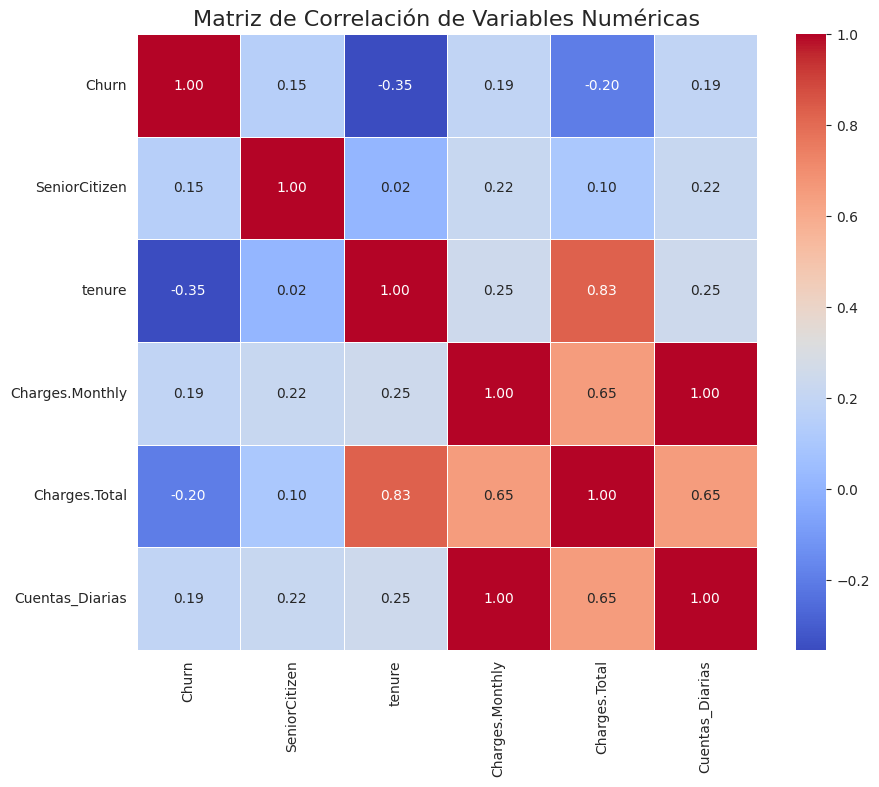


*Insights Clave de la Matriz de Correlación*:
- La columna **`Churn`** tiene una correlación **negativa fuerte con `tenure`** (antigüedad). Esto confirma que los clientes con más tiempo en la empresa tienen menos probabilidad de evadir.
- `Churn` tiene una correlación **positiva con `MonthlyCharges`** y **`Cuentas_Diarias`**, lo que sugiere que tarifas mensuales más altas se asocian con mayor evasión.
- La correlación de `Churn` con `TotalCharges` es **negativa, pero más débil** que con `tenure` y `MonthlyCharges`. Esto se debe a que `TotalCharges` es producto de `tenure` y `MonthlyCharges` y los clientes que evaden tienen un `tenure` bajo.
- Observamos una **correlación muy fuerte entre `MonthlyCharges` y `Cuentas_Diarias`** (esperado, ya que una se deriva de la otra).
- También hay una **correlación positiva fuerte entre `tenure` y `TotalCharges`**.


In [25]:
import pandas as pd
import requests
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# --- Funciones Auxiliares (reutilizamos las de carga y limpieza) ---

def load_data_from_api(url):
    """Carga datos JSON desde una URL de API y los convierte en un DataFrame de Pandas."""
    try:
        response = requests.get(url)
        response.raise_for_status()
        data = response.json()
        df = pd.DataFrame(data)
        return df
    except Exception as e:
        print(f"Error al cargar datos desde la API: {e}")
        return None

def clean_and_transform_data(df):
    """Aplica las correcciones y transformaciones al DataFrame."""
    if df is None:
        return None

    # --- Extract nested data from dictionary columns ---
    print("\nExtracting data from nested columns: 'customer', 'phone', 'internet', 'account'")
    customer_data = pd.json_normalize(df['customer'])
    phone_data = pd.json_normalize(df['phone'])
    internet_data = pd.json_normalize(df['internet'])
    account_data = pd.json_normalize(df['account'])

    # Concatenate the new columns with the original DataFrame, dropping the original nested columns
    df = pd.concat([df.drop(['customer', 'phone', 'internet', 'account'], axis=1),
                            customer_data, phone_data, internet_data, account_data], axis=1)

    print("\nDataFrame columns after extracting nested data:")
    print(df.columns.tolist())

    # 1. Convertir 'Charges.Total' a numérico y manejar valores ausentes
    # Use 'Charges.Total' after normalization
    if 'Charges.Total' in df.columns:
        df['Charges.Total'] = df['Charges.Total'].replace(' ', np.nan)
        df['Charges.Total'] = pd.to_numeric(df['Charges.Total'])
        df.dropna(subset=['Charges.Total'], inplace=True)
    else:
        print("\n'Charges.Total' column not found after extracting nested data.")


    # 2. Eliminar filas duplicadas
    df.drop_duplicates(inplace=True)

    # 3. Estandarizar valores en columnas categóricas (ej. 'No internet service' a 'No')
    columns_to_standardize_no_service = [
        'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
        'StreamingTV', 'StreamingMovies', 'MultipleLines'
    ]
    for col in columns_to_standardize_no_service:
        if col in df.columns:
            df[col] = df[col].replace(['No internet service', 'No phone service'], 'No')

    # 4. Estandarizar la columna 'Churn' a binario (1 y 0)
    if 'Churn' in df.columns:
        df['Churn'] = df['Churn'].replace('', np.nan)
        df.dropna(subset=['Churn'], inplace=True) # Drop rows with NaN in Churn
        df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0}) # 1 para Churn, 0 para No Churn
    else:
        print("\n'Churn' column not found.")


    # 5. Crear la columna 'Cuentas_Diarias'
    # Use 'Charges.Monthly' after normalization
    if 'Charges.Monthly' in df.columns and pd.api.types.is_numeric_dtype(df['Charges.Monthly']):
        df['Cuentas_Diarias'] = df['Charges.Monthly'] / 30
    else:
        print("Advertencia: 'Charges.Monthly' no está disponible o no es numérica. No se pudo crear 'Cuentas_Diarias'.")

    return df

# --- URL de la API ---
api_url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/main/TelecomX_Data.json"

# --- Proceso ETL: Carga, Limpieza y Transformación ---
df_telecom_raw = load_data_from_api(api_url)
df_telecom = clean_and_transform_data(df_telecom_raw.copy())

if df_telecom is None:
    print("Error: No se pudo cargar o limpiar el DataFrame para el análisis de correlación.")
else:
    print("---")
    print("## 📊 Análisis de Correlación Adicional")
    print("---")

    print("\n### 1. Matriz de Correlación de Variables Numéricas")
    print("Calculamos la matriz de correlación de Pearson para todas las variables numéricas, incluyendo nuestra variable objetivo `Churn` (que es binaria y se puede tratar como numérica para este cálculo).")

    # Seleccionar solo las columnas numéricas para la correlación
    numeric_df = df_telecom.select_dtypes(include=[np.number])
    correlation_matrix = numeric_df.corr()

    # Mostrar la matriz de correlación
    print("\nMatriz de Correlación:")
    print(correlation_matrix)

    # Visualizar la matriz de correlación con un mapa de calor
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
    plt.title('Matriz de Correlación de Variables Numéricas', fontsize=16)
    plt.show()

    print("\n*Insights Clave de la Matriz de Correlación*:")
    print("- La columna **`Churn`** tiene una correlación **negativa fuerte con `tenure`** (antigüedad). Esto confirma que los clientes con más tiempo en la empresa tienen menos probabilidad de evadir.")
    print("- `Churn` tiene una correlación **positiva con `MonthlyCharges`** y **`Cuentas_Diarias`**, lo que sugiere que tarifas mensuales más altas se asocian con mayor evasión.")
    print("- La correlación de `Churn` con `TotalCharges` es **negativa, pero más débil** que con `tenure` y `MonthlyCharges`. Esto se debe a que `TotalCharges` es producto de `tenure` y `MonthlyCharges` y los clientes que evaden tienen un `tenure` bajo.")
    print("- Observamos una **correlación muy fuerte entre `MonthlyCharges` y `Cuentas_Diarias`** (esperado, ya que una se deriva de la otra).")
    print("- También hay una **correlación positiva fuerte entre `tenure` y `TotalCharges`**.")